# Single Type Experiment

In [1]:
import warnings;
warnings.filterwarnings('ignore');

from time import sleep
from tqdm.auto import tqdm
import os
import sys
import importlib
import numpy as np
import nbformat
import pandas as pd
import scipy.optimize as optimization
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd


from radar_plot import radar_factory, normalize
from algorithms_single import *

In [17]:
scale_list = np.linspace(0,.5,10)

### Scaling with n

In [1]:
def hope_guardrail(budget, size, mean, stdev, Lt):
    allocation = np.zeros(len(size))
    budget_remaining = budget
    rem = len(size)
    
    size_future = size[0] + np.sum(mean[1:])
    c = np.sqrt(np.max(stdev)*np.mean(mean)*rem) / size_future
    thresh_lower = budget / (size_future*(1+c))
    
    c = Lt*(1 +  np.sqrt(np.max(stdev)*np.mean(mean)*rem) / size_future) \
                - np.sqrt(np.max(stdev)*np.mean(mean)*rem) / size_future
    
    thresh_upper = budget / (size_future * (1-c))
    print(f'Lt: {Lt}, thresh_lower: {thresh_lower}, thresh_upper: {thresh_upper}, c:{c}')
    
    for i in range(len(allocation)):
    
        rem = len(allocation) - i - 1
        conf_bnd = np.sqrt(np.max(stdev)*np.mean(mean)*(rem))
#         print(budget_remaining,rem, conf_bnd)
        
        # print('test')
        
        
        if rem == 0 and budget_remaining / size[i] >= thresh_lower and budget_remaining / size[i] <= thresh_upper:
            allocation[i] = budget_remaining / size[i]
        
        elif budget_remaining / size[i] < thresh_lower:
            # print(str(i) + ' giving rest of budget!')
            allocation[i] = budget_remaining / size[i]
        
        
        
        elif budget_remaining >= thresh_lower * (np.sum(mean[i+1:]) + clow*conf_bnd) + size[i] * thresh_upper:
            allocation[i] = thresh_upper

        else:
            allocation[i] = thresh_lower

            
        budget_remaining -= allocation[i] * size[i]

        
    if np.round(budget_remaining, 3) < 0:
        print(budget_remaining)
        print('Error: Negative Budget')
                
        
    return allocation



In [159]:
scale_list = np.linspace(0, .5, 100)

In [167]:
data = []

num_iterations = 100

# for n in tqdm(np.arange(1, max_n+1, 1000)):



n = 200
expec_size = 1.5

for scale in scale_list:
    
    mean_size = np.zeros(n) + expec_size
    stdev_size = mean_size
#     stdev_size = 1
    
    algo = lambda a,b,c,d: hope_guardrail(a,b,c,d,scale)
        
    for i in range(num_iterations):
        
#         size = 1+np.random.poisson(size=n,lam = mean_size-1)
        size = 1 + np.random.normal(size=n, loc = mean_size - 1, scale=.1)
        budget = expec_size * n
        
        index = 0        

        opt = offline_opt(budget, size, mean_size, stdev_size)


        sol = algo(budget, size, mean_size, stdev_size)

        data_dict = {'NumGroups': n, 'Algorithm':scale, 'Norm': 'L1', 'Value': np.sum(np.abs(opt-sol))}
        data.append(data_dict)
        data_dict = {'NumGroups': n, 'Algorithm':scale, 'Norm': 'Linf', 'Value': np.max(np.abs(opt-sol))}
        data.append(data_dict)
        data_dict = {'NumGroups': n, 'Algorithm':scale, 'Norm': 'Hindsight', 'Value': np.max(sol) - np.min(sol)}
        data.append(data_dict)
        if np.around(budget - np.dot(size, sol), 3) < 0:
            print('ERROR: ' + str(algo))
            print(np.dot(size, sol), budget)

        data_dict = {'NumGroups': n, 'Algorithm':scale, 'Norm': 'Waste', 'Value': (budget - np.dot(size, sol))}
        data.append(data_dict)

        index += 1

    
    

Lt: 0.0, thresh_lower: 0.9341206608610261, thresh_upper: 0.9341206608610261, c:-0.0707237736697759
Lt: 0.0, thresh_lower: 0.9335105850697392, thresh_upper: 0.9335105850697392, c:-0.07067431941912079
Lt: 0.0, thresh_lower: 0.9342815259488828, thresh_upper: 0.9342815259488828, c:-0.07073681455231795
Lt: 0.0, thresh_lower: 0.9339706456966698, thresh_upper: 0.9339706456966698, c:-0.07071161264641238
Lt: 0.0, thresh_lower: 0.9335143791821421, thresh_upper: 0.9335143791821421, c:-0.07067462696512727
Lt: 0.0, thresh_lower: 0.9336213974886118, thresh_upper: 0.9336213974886118, c:-0.07068330180798964
Lt: 0.0, thresh_lower: 0.933979539596049, thresh_upper: 0.933979539596049, c:-0.0707123336252747
Lt: 0.0, thresh_lower: 0.9332450870507811, thresh_upper: 0.9332450870507811, c:-0.07065279892048651
Lt: 0.0, thresh_lower: 0.9338844786251446, thresh_upper: 0.9338844786251446, c:-0.07070462761235327
Lt: 0.0, thresh_lower: 0.9341799828297501, thresh_upper: 0.9341799828297501, c:-0.07072858269881421
Lt: 

Lt: 0.005050505050505051, thresh_lower: 0.9343047294938105, thresh_upper: 0.9390473930953017, c:-0.06533092443496706
Lt: 0.005050505050505051, thresh_lower: 0.9335523426563469, thresh_upper: 0.938291187035313, c:-0.06527024109383718
Lt: 0.005050505050505051, thresh_lower: 0.9336927175747226, thresh_upper: 0.9384322745167261, c:-0.06528156243006158
Lt: 0.005050505050505051, thresh_lower: 0.9343667636085699, thresh_upper: 0.939109742104045, c:-0.06533592807044274
Lt: 0.005050505050505051, thresh_lower: 0.9342432787487174, thresh_upper: 0.9389856304174926, c:-0.06532596790008872
Lt: 0.005050505050505051, thresh_lower: 0.9340553112789025, thresh_upper: 0.9387967087980846, c:-0.06531080698177379
Lt: 0.005050505050505051, thresh_lower: 0.9341973237340514, thresh_upper: 0.9389394421286406, c:-0.06532226126023571
Lt: 0.005050505050505051, thresh_lower: 0.9336136449706787, thresh_upper: 0.9383528005289055, c:-0.0652751851391492
Lt: 0.005050505050505051, thresh_lower: 0.9340343393811366, thresh_

Lt: 0.010101010101010102, thresh_lower: 0.9341384275150181, thresh_upper: 0.9436704522855796, c:-0.059909807745610354
Lt: 0.010101010101010102, thresh_lower: 0.9340461245468152, thresh_upper: 0.9435772074503542, c:-0.05990240070757595
Lt: 0.010101010101010102, thresh_lower: 0.933721652283123, thresh_upper: 0.9432494242451955, c:-0.05987636359729201
Lt: 0.010101010101010102, thresh_lower: 0.9343011258574803, thresh_upper: 0.9438348108152099, c:-0.059922864054644774
Lt: 0.010101010101010102, thresh_lower: 0.9338592788544444, thresh_upper: 0.9433884551692856, c:-0.05988740721465265
Lt: 0.010101010101010102, thresh_lower: 0.9340205285105282, thresh_upper: 0.9435513502300232, c:-0.0599003467203027
Lt: 0.010101010101010102, thresh_lower: 0.9339339730328475, thresh_upper: 0.9434639115331827, c:-0.05989340102222582
Lt: 0.010101010101010102, thresh_lower: 0.933999707445969, thresh_upper: 0.9435303167056216, c:-0.05989867591272732
Lt: 0.010101010101010102, thresh_lower: 0.9336536560721863, thres

Lt: 0.010101010101010102, thresh_lower: 0.9340467394909733, thresh_upper: 0.9435778286694524, c:-0.05990245005466885
Lt: 0.010101010101010102, thresh_lower: 0.9344055948622604, thresh_upper: 0.9439403458302427, c:-0.059931247712283836
Lt: 0.010101010101010102, thresh_lower: 0.9344043641923021, thresh_upper: 0.9439391026024277, c:-0.05993114895001205
Lt: 0.010101010101010102, thresh_lower: 0.9341109415563836, thresh_upper: 0.9436426858579794, c:-0.0599076020685441
Lt: 0.010101010101010102, thresh_lower: 0.9338111869322304, thresh_upper: 0.9433398725131716, c:-0.05988354813146711
Lt: 0.010101010101010102, thresh_lower: 0.9343199978250583, thresh_upper: 0.9438538753538855, c:-0.059924378523841804
Lt: 0.010101010101010102, thresh_lower: 0.9340456911672302, thresh_upper: 0.9435767696485285, c:-0.05990236593040037
Lt: 0.010101010101010102, thresh_lower: 0.9341789629585642, thresh_upper: 0.9437114013561005, c:-0.0599130606268303
Lt: 0.010101010101010102, thresh_lower: 0.9340384732447234, thre

Lt: 0.015151515151515152, thresh_lower: 0.9341661680733447, thresh_upper: 0.9485379552744732, c:-0.054504319404466754
Lt: 0.015151515151515152, thresh_lower: 0.9346228638252461, thresh_upper: 0.9490016771148652, c:-0.05454078256386614
Lt: 0.015151515151515152, thresh_lower: 0.9341130676041112, thresh_upper: 0.9484840378749436, c:-0.05450007996030082
Lt: 0.015151515151515152, thresh_lower: 0.9342848057420995, thresh_upper: 0.9486584181381319, c:-0.05451379134171605
Lt: 0.015151515151515152, thresh_lower: 0.934164650269402, thresh_upper: 0.9485364141197005, c:-0.05450419822530783
Lt: 0.015151515151515152, thresh_lower: 0.9336442082470732, thresh_upper: 0.9480079652970279, c:-0.05446264856757513
Lt: 0.015151515151515152, thresh_lower: 0.9338954900540386, thresh_upper: 0.9482631129779471, c:-0.05448270932336305
Lt: 0.015151515151515152, thresh_lower: 0.9341031402374215, thresh_upper: 0.9484739577795357, c:-0.05449928738131668
Lt: 0.015151515151515152, thresh_lower: 0.9340551694203996, thre

Lt: 0.020202020202020204, thresh_lower: 0.934142951359005, thresh_upper: 0.9534036307684691, c:-0.049094760867415946
Lt: 0.020202020202020204, thresh_lower: 0.9341734463043553, thresh_upper: 0.9534347544755792, c:-0.04909718304935212
Lt: 0.020202020202020204, thresh_lower: 0.9336927710515596, thresh_upper: 0.9529441683928288, c:-0.049059004812954846
Lt: 0.020202020202020204, thresh_lower: 0.9340301737952554, thresh_upper: 0.9532885278941267, c:-0.04908580315945992
Lt: 0.020202020202020204, thresh_lower: 0.934155786524996, thresh_upper: 0.9534167305770578, c:-0.04909578034999859
Lt: 0.020202020202020204, thresh_lower: 0.9335712105954969, thresh_upper: 0.9528201015356101, c:-0.049049350161088606
Lt: 0.020202020202020204, thresh_lower: 0.9336637657454834, thresh_upper: 0.9529145650392045, c:-0.049056701118942864
Lt: 0.020202020202020204, thresh_lower: 0.934309168305773, thresh_upper: 0.9535732748687787, c:-0.049107963443071403
Lt: 0.020202020202020204, thresh_lower: 0.9340028959707746, th

Lt: 0.025252525252525256, thresh_lower: 0.9337135581761988, thresh_upper: 0.9579030285952715, c:-0.043653126645380215
Lt: 0.025252525252525256, thresh_lower: 0.9337553244817326, thresh_upper: 0.9579458769294459, c:-0.04365642678774219
Lt: 0.025252525252525256, thresh_lower: 0.9338389906879714, thresh_upper: 0.9580317106539811, c:-0.043663037691197185
Lt: 0.025252525252525256, thresh_lower: 0.9346130594638533, thresh_upper: 0.9588258330250932, c:-0.04372420487573826
Lt: 0.025252525252525256, thresh_lower: 0.9345601241492619, thresh_upper: 0.9587715263292946, c:-0.04372002168033397
Lt: 0.025252525252525256, thresh_lower: 0.9339866279259097, thresh_upper: 0.9581831726908296, c:-0.04367470348390381
Lt: 0.025252525252525256, thresh_lower: 0.9336638877392375, thresh_upper: 0.957852071359425, c:-0.043649201989456904
Lt: 0.025252525252525256, thresh_lower: 0.9347051368399347, thresh_upper: 0.9589202958254253, c:-0.043731481339258776
Lt: 0.025252525252525256, thresh_lower: 0.933932414984842, th

Lt: 0.030303030303030304, thresh_lower: 0.9336848180979288, thresh_upper: 0.962862468663489, c:-0.03824333838810376
Lt: 0.030303030303030304, thresh_lower: 0.9335685217214746, thresh_upper: 0.9627425380252705, c:-0.038234197052999075
Lt: 0.030303030303030304, thresh_lower: 0.933791880421676, thresh_upper: 0.9629728766848538, c:-0.0382517540340457
Lt: 0.030303030303030304, thresh_lower: 0.9338488547209727, thresh_upper: 0.963031631431003, c:-0.03825623256083831
Lt: 0.030303030303030304, thresh_lower: 0.9340144656881211, thresh_upper: 0.963202417740875, c:-0.0382692508105019
Lt: 0.030303030303030304, thresh_lower: 0.9342415244984522, thresh_upper: 0.963436572139029, c:-0.03828709984677681
Lt: 0.030303030303030304, thresh_lower: 0.9337059578341317, thresh_upper: 0.9628842690164483, c:-0.0382450000686247
Lt: 0.030303030303030304, thresh_lower: 0.9338565987055714, thresh_upper: 0.9630396174151203, c:-0.03825684128815693
Lt: 0.030303030303030304, thresh_lower: 0.9333454922665099, thresh_uppe

Lt: 0.030303030303030304, thresh_lower: 0.933704112045206, thresh_upper: 0.9628823655466185, c:-0.03824485498091147
Lt: 0.030303030303030304, thresh_lower: 0.9341056955560028, thresh_upper: 0.9632964985421277, c:-0.03827642229384136
Lt: 0.030303030303030304, thresh_lower: 0.9338672545884129, thresh_upper: 0.963050606294301, c:-0.03825767891069389
Lt: 0.030303030303030304, thresh_lower: 0.9336721984199025, thresh_upper: 0.9628494546205245, c:-0.038242346425888224
Lt: 0.030303030303030304, thresh_lower: 0.933739325563187, thresh_upper: 0.9629186794870365, c:-0.03824762293646369
Lt: 0.030303030303030304, thresh_lower: 0.9337903515469393, thresh_upper: 0.9629713000327811, c:-0.03825163385571567
Lt: 0.030303030303030304, thresh_lower: 0.9338764917205279, thresh_upper: 0.9630601320867944, c:-0.038258405011177964
Lt: 0.030303030303030304, thresh_lower: 0.9332990937417598, thresh_upper: 0.9624646904211899, c:-0.038213019613067285
Lt: 0.030303030303030304, thresh_lower: 0.9337514765360927, thre

Lt: 0.03535353535353536, thresh_lower: 0.9338259923000705, thresh_upper: 0.96804998154667, c:-0.03284686024618933
Lt: 0.03535353535353536, thresh_lower: 0.9336113773701591, thresh_upper: 0.967827501148123, c:-0.03283007832927064
Lt: 0.03535353535353536, thresh_lower: 0.9341912779021299, thresh_upper: 0.9684286545791712, c:-0.03287542518235968
Lt: 0.03535353535353536, thresh_lower: 0.9343916691503643, thresh_upper: 0.9686363900092783, c:-0.03289109623083205
Lt: 0.03535353535353536, thresh_lower: 0.9340804014206695, thresh_upper: 0.9683137145617411, c:-0.03286675459528206
Lt: 0.03535353535353536, thresh_lower: 0.9338295380665841, thresh_upper: 0.9680536572627415, c:-0.03284713751367442
Lt: 0.03535353535353536, thresh_lower: 0.9343500412569277, thresh_upper: 0.968593236486239, c:-0.03288784079635992
Lt: 0.03535353535353536, thresh_lower: 0.9339840898766505, thresh_upper: 0.9682138732752712, c:-0.03285922311052842
Lt: 0.03535353535353536, thresh_lower: 0.9345081056897194, thresh_upper: 0.9

Lt: 0.04040404040404041, thresh_lower: 0.9341020259809886, thresh_upper: 0.9734326376012408, c:-0.027460757436453806
Lt: 0.04040404040404041, thresh_lower: 0.9339286084343191, thresh_upper: 0.9732519182631326, c:-0.027447267359894036
Lt: 0.04040404040404041, thresh_lower: 0.9339079312468556, thresh_upper: 0.9732303704572494, c:-0.02744565891398814
Lt: 0.04040404040404041, thresh_lower: 0.9337233151574473, thresh_upper: 0.9730379810588135, c:-0.027431298141838034
Lt: 0.04040404040404041, thresh_lower: 0.9341333651821966, thresh_upper: 0.9734652963477627, c:-0.027463195337264275
Lt: 0.04040404040404041, thresh_lower: 0.934606085544485, thresh_upper: 0.9739579207253053, c:-0.027499970024955377
Lt: 0.04040404040404041, thresh_lower: 0.9334506044783663, thresh_upper: 0.9727537878248238, c:-0.027410085471037182
Lt: 0.04040404040404041, thresh_lower: 0.9341445273749094, thresh_upper: 0.9734769285275372, c:-0.027464063655701795
Lt: 0.04040404040404041, thresh_lower: 0.9340941488828034, thresh_

Lt: 0.045454545454545456, thresh_lower: 0.9335425071914235, thresh_upper: 0.9779969122957769, c:-0.022009774855897953
Lt: 0.045454545454545456, thresh_lower: 0.9344440788380234, thresh_upper: 0.9789414159255485, c:-0.022079538374558755
Lt: 0.045454545454545456, thresh_lower: 0.9343789745078583, thresh_upper: 0.9788732113891853, c:-0.02207450028932683
Lt: 0.045454545454545456, thresh_lower: 0.9341635416628434, thresh_upper: 0.9786475198372647, c:-0.02205782941691383
Lt: 0.045454545454545456, thresh_lower: 0.9344526694317504, thresh_upper: 0.9789504155951672, c:-0.022080203159600985
Lt: 0.045454545454545456, thresh_lower: 0.9341343056201842, thresh_upper: 0.9786168916020977, c:-0.022055567081714016
Lt: 0.045454545454545456, thresh_lower: 0.9336682630096355, thresh_upper: 0.9781286564862849, c:-0.022019505256250065
Lt: 0.045454545454545456, thresh_lower: 0.9340315891501813, thresh_upper: 0.9785092838716184, c:-0.022047618784235244
Lt: 0.045454545454545456, thresh_lower: 0.9336098311738062

Lt: 0.05050505050505051, thresh_lower: 0.9338223219066671, thresh_upper: 0.9834937220080857, c:-0.016623852187889504
Lt: 0.05050505050505051, thresh_lower: 0.9337127329910649, thresh_upper: 0.9833783038948453, c:-0.016615417365166293
Lt: 0.05050505050505051, thresh_lower: 0.9337049775218814, thresh_upper: 0.983370135900705, c:-0.016614820448715567
Lt: 0.05050505050505051, thresh_lower: 0.9336097545784824, thresh_upper: 0.9832698479071251, c:-0.016607491466173144
Lt: 0.05050505050505051, thresh_lower: 0.9340758913664591, thresh_upper: 0.9837607792051006, c:-0.016643369419506733
Lt: 0.05050505050505051, thresh_lower: 0.9343068746523963, thresh_upper: 0.9840040488360343, c:-0.016661148846432695
Lt: 0.05050505050505051, thresh_lower: 0.9340061458211493, thresh_upper: 0.9836873237903594, c:-0.016638001032839696
Lt: 0.05050505050505051, thresh_lower: 0.9339096164135362, thresh_upper: 0.9835856598397882, c:-0.016630571158158393
Lt: 0.05050505050505051, thresh_lower: 0.9345210958034494, thresh

Lt: 0.05050505050505051, thresh_lower: 0.9333003421609614, thresh_upper: 0.9829439773822892, c:-0.01658367778579184
Lt: 0.05050505050505051, thresh_lower: 0.9337487845727729, thresh_upper: 0.9834162731138778, c:-0.016618192162288076
Lt: 0.05050505050505051, thresh_lower: 0.9335208513089835, thresh_upper: 0.9831762157403124, c:-0.016600648982586057
Lt: 0.05050505050505051, thresh_lower: 0.9335178324181073, thresh_upper: 0.9831730362701342, c:-0.016600416633791318
Lt: 0.05050505050505051, thresh_lower: 0.9335448532222256, thresh_upper: 0.9832014943510671, c:-0.01660249629249235
Lt: 0.05050505050505051, thresh_lower: 0.9334151178528076, thresh_upper: 0.9830648581641271, c:-0.016592511275370606
Lt: 0.05050505050505051, thresh_lower: 0.9337763335374207, thresh_upper: 0.9834452874489857, c:-0.016620312545147196
Lt: 0.05050505050505051, thresh_lower: 0.9343290454256161, thresh_upper: 0.984027398905702, c:-0.016662855425313823
Lt: 0.05050505050505051, thresh_lower: 0.9337556489053229, thresh_u

Lt: 0.05555555555555556, thresh_lower: 0.9335773926612445, thresh_upper: 0.9884937098766118, c:-0.011197527296730576
Lt: 0.05555555555555556, thresh_lower: 0.9335098321234385, thresh_upper: 0.9884221751895231, c:-0.011192355142575397
Lt: 0.05555555555555556, thresh_lower: 0.9337724129994156, thresh_upper: 0.9887002019993811, c:-0.011212457540590831
Lt: 0.05555555555555556, thresh_lower: 0.933582205433563, thresh_upper: 0.9884988057531843, c:-0.01119789574460777
Lt: 0.05555555555555556, thresh_lower: 0.9339296115286301, thresh_upper: 0.9888666475009025, c:-0.011224492567217609
Lt: 0.05555555555555556, thresh_lower: 0.9338872580816093, thresh_upper: 0.9888218026746453, c:-0.011221249984114515
Lt: 0.05555555555555556, thresh_lower: 0.9339209228351035, thresh_upper: 0.9888574477077566, c:-0.011223827358489452
Lt: 0.05555555555555556, thresh_lower: 0.9340182387377607, thresh_upper: 0.9889604880752758, c:-0.01123127794033086
Lt: 0.05555555555555556, thresh_lower: 0.9340322205174102, thresh_u

Lt: 0.06060606060606061, thresh_lower: 0.9339657107298156, thresh_upper: 0.994221563034965, c:-0.005819623954351719
Lt: 0.06060606060606061, thresh_lower: 0.9337673399503793, thresh_upper: 0.9940103941407264, c:-0.005804517983766286
Lt: 0.06060606060606061, thresh_lower: 0.9339444392063662, thresh_upper: 0.9941989191551639, c:-0.005818004102290358
Lt: 0.06060606060606061, thresh_lower: 0.9334709974225892, thresh_upper: 0.9936949327401755, c:-0.005781952292096881
Lt: 0.06060606060606061, thresh_lower: 0.9339835624685194, thresh_upper: 0.9942405664987466, c:-0.005820983389723644
Lt: 0.06060606060606061, thresh_lower: 0.9342041579872286, thresh_upper: 0.9944753939864047, c:-0.005837782356475932
Lt: 0.06060606060606061, thresh_lower: 0.9335988439331676, thresh_upper: 0.9938310274127268, c:-0.0057916873380862155
Lt: 0.06060606060606061, thresh_lower: 0.9336629841375825, thresh_upper: 0.993899305694846, c:-0.005796571451956542
Lt: 0.06060606060606061, thresh_lower: 0.9337442735517301, thresh

Lt: 0.06565656565656566, thresh_lower: 0.9336397370549367, thresh_upper: 0.9992468537128508, c:-0.0003873023087019034
Lt: 0.06565656565656566, thresh_lower: 0.9337284657788241, thresh_upper: 0.9993418174281469, c:-0.00039402250498792035
Lt: 0.06565656565656566, thresh_lower: 0.9335280636514487, thresh_upper: 0.9991273329891182, c:-0.00037884444103139514
Lt: 0.06565656565656566, thresh_lower: 0.9338372877758446, thresh_upper: 0.9994582863763095, c:-0.0004022646624988607
Lt: 0.06565656565656566, thresh_lower: 0.933972848623529, thresh_upper: 0.9996033731213986, c:-0.00041253220548211067
Lt: 0.06565656565656566, thresh_lower: 0.9335690774705188, thresh_upper: 0.999171228860339, c:-0.0003819507097384267
Lt: 0.06565656565656566, thresh_lower: 0.9340073370873805, thresh_upper: 0.9996402850989261, c:-0.0004151444371855578
Lt: 0.06565656565656566, thresh_lower: 0.9342141549728356, thresh_upper: 0.9998616361330889, c:-0.0004308095624847158
Lt: 0.06565656565656566, thresh_lower: 0.93412955511601

Lt: 0.07070707070707072, thresh_lower: 0.9335733490302636, thresh_upper: 1.0046061038477834, c:0.0050251975260773435
Lt: 0.07070707070707072, thresh_lower: 0.9335264187870029, thresh_upper: 1.0045556028251446, c:0.005028732675675135
Lt: 0.07070707070707072, thresh_lower: 0.9336433899830915, thresh_upper: 1.0046814740035441, c:0.0050199214520204455
Lt: 0.07070707070707072, thresh_lower: 0.9339229145991418, thresh_upper: 1.0049822667969028, c:0.0049988647480924825
Lt: 0.07070707070707072, thresh_lower: 0.9335606483223381, thresh_upper: 1.0045924367816463, c:0.005026154244298864
Lt: 0.07070707070707072, thresh_lower: 0.9340211522073308, thresh_upper: 1.0050879790057148, c:0.004991464257137979
Lt: 0.07070707070707072, thresh_lower: 0.9338490586393507, thresh_upper: 1.0049027913619102, c:0.005004428434455213
Lt: 0.07070707070707072, thresh_lower: 0.9338848310977825, thresh_upper: 1.0049412856378312, c:0.0050017336463048095
Lt: 0.07070707070707072, thresh_lower: 0.9343538671011563, thresh_up

Lt: 0.07070707070707072, thresh_lower: 0.9343720894150749, thresh_upper: 1.0054656179575263, c:0.0049650263582228515
Lt: 0.07070707070707072, thresh_lower: 0.9338186988419943, thresh_upper: 1.004870121579972, c:0.005006715468003492
Lt: 0.07070707070707072, thresh_lower: 0.9333661153180611, thresh_upper: 1.004383102353131, c:0.005040807785741064
Lt: 0.07070707070707072, thresh_lower: 0.9336576911903425, thresh_upper: 1.0046968633461293, c:0.00501884415784723
Lt: 0.07070707070707072, thresh_lower: 0.9345154050941082, thresh_upper: 1.0056198380903991, c:0.004954229249391082
Lt: 0.07070707070707072, thresh_lower: 0.9343744453724182, thresh_upper: 1.0054681531724936, c:0.004964848867130972
Lt: 0.07070707070707072, thresh_lower: 0.9340781891460856, thresh_upper: 1.0051493557115485, c:0.004987167467758111
Lt: 0.07070707070707072, thresh_lower: 0.9340400167781341, thresh_upper: 1.0051082789242964, c:0.004990043128041785
Lt: 0.07070707070707072, thresh_lower: 0.9343637011508737, thresh_upper: 1

Lt: 0.07575757575757576, thresh_lower: 0.9340373619342742, thresh_upper: 1.0105978014370836, c:0.010397904848396575
Lt: 0.07575757575757576, thresh_lower: 0.9340173310456571, thresh_upper: 1.0105761286723502, c:0.010399405638206613
Lt: 0.07575757575757576, thresh_lower: 0.9337311969731905, thresh_upper: 1.0102665409873866, c:0.010420843386403256
Lt: 0.07575757575757576, thresh_lower: 0.934063140322325, thresh_upper: 1.0106256928077615, c:0.010395973427528266
Lt: 0.07575757575757576, thresh_lower: 0.9341029182486623, thresh_upper: 1.010668731219864, c:0.010392993089960237
Lt: 0.07575757575757576, thresh_lower: 0.93402364463197, thresh_upper: 1.0105829597657379, c:0.010398932600971786
Lt: 0.07575757575757576, thresh_lower: 0.9340584526925879, thresh_upper: 1.0106206209460786, c:0.01039632464422717
Lt: 0.07575757575757576, thresh_lower: 0.9336986445507262, thresh_upper: 1.0102313203335724, c:0.010423282221431088
Lt: 0.07575757575757576, thresh_lower: 0.933958674714931, thresh_upper: 1.010

Lt: 0.08080808080808081, thresh_lower: 0.9338714614378325, thresh_upper: 1.0159700514543453, c:0.015817928402726916
Lt: 0.08080808080808081, thresh_lower: 0.9341013881524315, thresh_upper: 1.0162201915064915, c:0.015800795667737497
Lt: 0.08080808080808081, thresh_lower: 0.9338727865828672, thresh_upper: 1.0159714930956467, c:0.015817829662718386
Lt: 0.08080808080808081, thresh_lower: 0.9342039205543844, thresh_upper: 1.0163317377459786, c:0.01579315538682992
Lt: 0.08080808080808081, thresh_lower: 0.9335687095160348, thresh_upper: 1.0156406839789829, c:0.015840486717759145
Lt: 0.08080808080808081, thresh_lower: 0.934105682473716, thresh_upper: 1.0162248633505262, c:0.015800475675459294
Lt: 0.08080808080808081, thresh_lower: 0.9340837021782916, thresh_upper: 1.016200950721438, c:0.015802113539727977
Lt: 0.08080808080808081, thresh_lower: 0.9341004258745633, thresh_upper: 1.0162191446327669, c:0.015800867372052163
Lt: 0.08080808080808081, thresh_lower: 0.934045958093225, thresh_upper: 1.0

Lt: 0.08585858585858587, thresh_lower: 0.9340302857734454, thresh_upper: 1.0217568871996807, c:0.02121375267164194
Lt: 0.08585858585858587, thresh_lower: 0.9339010256326171, thresh_upper: 1.0216154866036364, c:0.021223331396734296
Lt: 0.08585858585858587, thresh_lower: 0.9341697926511683, thresh_upper: 1.0219094969333222, c:0.021203414409484894
Lt: 0.08585858585858587, thresh_lower: 0.9336572999663271, thresh_upper: 1.0213488695764241, c:0.02124139199310711
Lt: 0.08585858585858587, thresh_lower: 0.9340363651866237, thresh_upper: 1.0217635376074667, c:0.02121330215670454
Lt: 0.08585858585858587, thresh_lower: 0.9341663686220085, thresh_upper: 1.0219057513102636, c:0.02120366815235679
Lt: 0.08585858585858587, thresh_lower: 0.9336769154733559, thresh_upper: 1.021370327423892, c:0.0212399384664861
Lt: 0.08585858585858587, thresh_lower: 0.9336120758480891, thresh_upper: 1.0212993978890699, c:0.021244743124280416
Lt: 0.08585858585858587, thresh_lower: 0.933876051062403, thresh_upper: 1.02158

Lt: 0.08585858585858587, thresh_lower: 0.9335670467204846, thresh_upper: 1.0212501395063864, c:0.02124807978374496
Lt: 0.08585858585858587, thresh_lower: 0.9337326122364374, thresh_upper: 1.0214312553746665, c:0.021235811262976828
Lt: 0.08585858585858587, thresh_lower: 0.9341255079164446, thresh_upper: 1.0218610528588732, c:0.021206696186736845
Lt: 0.08585858585858587, thresh_lower: 0.9334352161696257, thresh_upper: 1.0211059270805851, c:0.021257848300011886
Lt: 0.08585858585858587, thresh_lower: 0.9341678192036543, thresh_upper: 1.0219073381343844, c:0.021203560654820833
Lt: 0.08585858585858587, thresh_lower: 0.9341421830041847, thresh_upper: 1.0218792941150752, c:0.02120546046048563
Lt: 0.08585858585858587, thresh_lower: 0.9338012161496173, thresh_upper: 1.0215063027493052, c:0.021230727574802696
Lt: 0.08585858585858587, thresh_lower: 0.9339861599865035, thresh_upper: 1.0217086170018106, c:0.021217022600826946
Lt: 0.08585858585858587, thresh_lower: 0.9339610208805493, thresh_upper: 1

Lt: 0.09090909090909091, thresh_lower: 0.9341564345242328, thresh_upper: 1.027572077976656, c:0.026612114806286905
Lt: 0.09090909090909091, thresh_lower: 0.9344246811701787, thresh_upper: 1.0278671492871965, c:0.0265923454430306
Lt: 0.09090909090909091, thresh_lower: 0.9336761203801418, thresh_upper: 1.0270437324181558, c:0.026647511210298014
Lt: 0.09090909090909091, thresh_lower: 0.9335418959636329, thresh_upper: 1.0268960855599962, c:0.02665740232153653
Lt: 0.09090909090909091, thresh_lower: 0.9344230005162356, thresh_upper: 1.027865300567859, c:0.026592469307128774
Lt: 0.09090909090909091, thresh_lower: 0.9333558218678106, thresh_upper: 1.0266914040545918, c:0.026671113947175293
Lt: 0.09090909090909091, thresh_lower: 0.934576469593978, thresh_upper: 1.028034116553376, c:0.026581158515008918
Lt: 0.09090909090909091, thresh_lower: 0.934111873120225, thresh_upper: 1.0275230604322476, c:0.02661539883511871
Lt: 0.09090909090909091, thresh_lower: 0.9336571840728594, thresh_upper: 1.027022

Lt: 0.09595959595959597, thresh_lower: 0.9344627437796704, thresh_upper: 1.033651526638965, c:0.03199737611012965
Lt: 0.09595959595959597, thresh_lower: 0.9341727828601705, thresh_upper: 1.0333307877447697, c:0.0320186271489373
Lt: 0.09595959595959597, thresh_lower: 0.9338395034309492, thresh_upper: 1.0329621322867486, c:0.03204305181934916
Lt: 0.09595959595959597, thresh_lower: 0.9342765287705055, thresh_upper: 1.0334455457908385, c:0.03201102378884753
Lt: 0.09595959595959597, thresh_lower: 0.9342046314082152, thresh_upper: 1.033366016864953, c:0.0320162930361018
Lt: 0.09595959595959597, thresh_lower: 0.9337306060608808, thresh_upper: 1.0328416759779575, c:0.032051032189867434
Lt: 0.09595959595959597, thresh_lower: 0.9335137459066741, thresh_upper: 1.0326017971481647, c:0.03206692404931841
Lt: 0.09595959595959597, thresh_lower: 0.9340231912061326, thresh_upper: 1.033165317647007, c:0.03202959025478472
Lt: 0.09595959595959597, thresh_lower: 0.9339399986659678, thresh_upper: 1.033073294

Lt: 0.10101010101010102, thresh_lower: 0.9341416192038293, thresh_upper: 1.0391013516986416, c:0.037428615464114995
Lt: 0.10101010101010102, thresh_lower: 0.9343964410475367, thresh_upper: 1.0393848052101813, c:0.03741004421497729
Lt: 0.10101010101010102, thresh_lower: 0.9336057332812145, thresh_upper: 1.0385052538746096, c:0.03746766814134424
Lt: 0.10101010101010102, thresh_lower: 0.9338156316276975, thresh_upper: 1.038738736304967, c:0.03745237218053965
Lt: 0.10101010101010102, thresh_lower: 0.9339687003362787, thresh_upper: 1.0389090037448492, c:0.03744121726985504
Lt: 0.10101010101010102, thresh_lower: 0.9339599431272219, thresh_upper: 1.0388992625797187, c:0.03744185546007098
Lt: 0.10101010101010102, thresh_lower: 0.9337841571975929, thresh_upper: 1.0387037254220415, c:0.03745466585345647
Lt: 0.10101010101010102, thresh_lower: 0.9337547086710181, thresh_upper: 1.038670968072256, c:0.03745681188043995
Lt: 0.10101010101010102, thresh_lower: 0.9338695794142846, thresh_upper: 1.038798

Lt: 0.10101010101010102, thresh_lower: 0.9337535463039035, thresh_upper: 1.038669675102095, c:0.03745689658638969
Lt: 0.10101010101010102, thresh_lower: 0.9338099548489912, thresh_upper: 1.0387324216859566, c:0.03745278587187455
Lt: 0.10101010101010102, thresh_lower: 0.9342289452465824, thresh_upper: 1.0391984896563107, c:0.03742225127999976
Lt: 0.10101010101010102, thresh_lower: 0.9341037101957215, thresh_upper: 1.0390591832514204, c:0.03743137818657505
Lt: 0.10101010101010102, thresh_lower: 0.9340739252077054, thresh_upper: 1.0390260516355376, c:0.03743354883776673
Lt: 0.10101010101010102, thresh_lower: 0.9336243146941607, thresh_upper: 1.0385259230867632, c:0.03746631407423448
Lt: 0.10101010101010102, thresh_lower: 0.9338854221432217, thresh_upper: 1.0388163684514489, c:0.037447286215772424
Lt: 0.10101010101010102, thresh_lower: 0.9335338492307111, thresh_upper: 1.038425292964499, c:0.037472906449223894
Lt: 0.10101010101010102, thresh_lower: 0.9346535389372288, thresh_upper: 1.03967

Lt: 0.10606060606060606, thresh_lower: 0.934612974769937, thresh_upper: 1.045499259912133, c:0.04280216021577109
Lt: 0.10606060606060606, thresh_lower: 0.9338834766106123, thresh_upper: 1.0446832111237359, c:0.042855026715778385
Lt: 0.10606060606060606, thresh_lower: 0.9340213148635175, thresh_upper: 1.0448374030676635, c:0.042845038068814165
Lt: 0.10606060606060606, thresh_lower: 0.9342082144820557, thresh_upper: 1.0450464772172148, c:0.04283149378652641
Lt: 0.10606060606060606, thresh_lower: 0.9342900704336128, thresh_upper: 1.045138044891838, c:0.04282556171088543
Lt: 0.10606060606060606, thresh_lower: 0.9342359744640305, thresh_upper: 1.0450775307563733, c:0.04282948203740772
Lt: 0.10606060606060606, thresh_lower: 0.9341941549974137, thresh_upper: 1.045030749658124, c:0.042832512665656436
Lt: 0.10606060606060606, thresh_lower: 0.9337024743032597, thresh_upper: 1.0444807339663582, c:0.04286814299131807
Lt: 0.10606060606060606, thresh_lower: 0.9336664720908514, thresh_upper: 1.044440

Lt: 0.11111111111111112, thresh_lower: 0.9341065386582742, thresh_upper: 1.0508698559905585, c:0.04824655214445961
Lt: 0.11111111111111112, thresh_lower: 0.9338060597455968, thresh_upper: 1.0505318172137965, c:0.048268203772681276
Lt: 0.11111111111111112, thresh_lower: 0.9340345737716382, thresh_upper: 1.0507888954930928, c:0.048251737812612924
Lt: 0.11111111111111112, thresh_lower: 0.9344329697043954, thresh_upper: 1.0512370909174449, c:0.04822302936523214
Lt: 0.11111111111111112, thresh_lower: 0.9338788568680598, thresh_upper: 1.0506137139765674, c:0.04826295831619565
Lt: 0.11111111111111112, thresh_lower: 0.9337779120892027, thresh_upper: 1.0505001511003533, c:0.04827023195969472
Lt: 0.11111111111111112, thresh_lower: 0.9342890608903563, thresh_upper: 1.051075193501651, c:0.04823339964735361
Lt: 0.11111111111111112, thresh_lower: 0.9340901698120123, thresh_upper: 1.0508514410385137, c:0.04824773166083253
Lt: 0.11111111111111112, thresh_lower: 0.9338694006917234, thresh_upper: 1.0506

Lt: 0.11616161616161617, thresh_lower: 0.933765559696272, thresh_upper: 1.0564890332563535, c:0.05367867245510116
Lt: 0.11616161616161617, thresh_lower: 0.9339028032997114, thresh_upper: 1.0566443145905309, c:0.05366883945542818
Lt: 0.11616161616161617, thresh_lower: 0.9344368585131057, thresh_upper: 1.0572485599176853, c:0.05363057441782626
Lt: 0.11616161616161617, thresh_lower: 0.934050806279477, thresh_upper: 1.056811769390494, c:0.05365823535698837
Lt: 0.11616161616161617, thresh_lower: 0.9337912762359849, thresh_upper: 1.056518129684143, c:0.0536768299751233
Lt: 0.11616161616161617, thresh_lower: 0.9341692019897512, thresh_upper: 1.056945725679833, c:0.0536497523852871
Lt: 0.11616161616161617, thresh_lower: 0.9340019531801738, thresh_upper: 1.0567564955981394, c:0.053661735603832944
Lt: 0.11616161616161617, thresh_lower: 0.9337153195339793, thresh_upper: 1.0564321901013025, c:0.05368227192695184
Lt: 0.11616161616161617, thresh_lower: 0.9338314792167491, thresh_upper: 1.05656361648

Lt: 0.11616161616161617, thresh_lower: 0.9338980923127128, thresh_upper: 1.056638984445241, c:0.053669176983715594
Lt: 0.11616161616161617, thresh_lower: 0.9339200524356043, thresh_upper: 1.0566638307557124, c:0.0536676036037948
Lt: 0.11616161616161617, thresh_lower: 0.9339132424142919, thresh_upper: 1.0566561257030274, c:0.053668091522880504
Lt: 0.11616161616161617, thresh_lower: 0.9333792000687854, thresh_upper: 1.0560518949349686, c:0.053706352604834084
Lt: 0.11616161616161617, thresh_lower: 0.9341647558801062, thresh_upper: 1.0569406952243487, c:0.053650070948751974
Lt: 0.11616161616161617, thresh_lower: 0.9343417465029036, thresh_upper: 1.0571409474718565, c:0.05363738941655331
Lt: 0.11616161616161617, thresh_lower: 0.9341361355678685, thresh_upper: 1.0569083133853598, c:0.05365212158711548
Lt: 0.11616161616161617, thresh_lower: 0.9339423922972325, thresh_upper: 1.0566891067134403, c:0.05366600301131258
Lt: 0.11616161616161617, thresh_lower: 0.9340574223670763, thresh_upper: 1.056

Lt: 0.12121212121212122, thresh_lower: 0.9337413726018898, thresh_upper: 1.0625332860642194, c:0.05908794589117672
Lt: 0.12121212121212122, thresh_lower: 0.9345283926380227, thresh_upper: 1.0634288605880948, c:0.0590318784577752
Lt: 0.12121212121212122, thresh_lower: 0.9341201743853675, thresh_upper: 1.0629643363695562, c:0.05906096082551268
Lt: 0.12121212121212122, thresh_lower: 0.9337813772980826, thresh_upper: 1.0625788086495425, c:0.05908509611139595
Lt: 0.12121212121212122, thresh_lower: 0.9340290244446512, thresh_upper: 1.0628606140232237, c:0.059067454302605224
Lt: 0.12121212121212122, thresh_lower: 0.9337881798968718, thresh_upper: 1.0625865495378197, c:0.0590846115188598
Lt: 0.12121212121212122, thresh_lower: 0.9337113992963131, thresh_upper: 1.0624991785095979, c:0.05909008106218874
Lt: 0.12121212121212122, thresh_lower: 0.9340138435648888, thresh_upper: 1.0628433392290113, c:0.05906853577233109
Lt: 0.12121212121212122, thresh_lower: 0.9345374576535601, thresh_upper: 1.063439

Lt: 0.12626262626262627, thresh_lower: 0.9340415587320438, thresh_upper: 1.069018662595056, c:0.06447422481182494
Lt: 0.12626262626262627, thresh_lower: 0.9342106218686769, thresh_upper: 1.0692121568207977, c:0.06446224996173062
Lt: 0.12626262626262627, thresh_lower: 0.9341097212414099, thresh_upper: 1.06909667517803, c:0.064469396854575
Lt: 0.12626262626262627, thresh_lower: 0.9334596952967762, thresh_upper: 1.0683527148483338, c:0.06451543622803968
Lt: 0.12626262626262627, thresh_lower: 0.9340218554509395, thresh_upper: 1.068996112018994, c:0.06447562038788163
Lt: 0.12626262626262627, thresh_lower: 0.9338609739239471, thresh_upper: 1.068811981716425, c:0.06448701541067764
Lt: 0.12626262626262627, thresh_lower: 0.9338597304820934, thresh_upper: 1.068810558586442, c:0.06448710348091549
Lt: 0.12626262626262627, thresh_lower: 0.9343201558433826, thresh_upper: 1.069337519404565, c:0.06445449143659843
Lt: 0.12626262626262627, thresh_lower: 0.9342402157368319, thresh_upper: 1.06924602725949

Lt: 0.13131313131313133, thresh_lower: 0.9341127037095509, thresh_upper: 1.0753157868284366, c:0.06987687817368265
Lt: 0.13131313131313133, thresh_lower: 0.9340546650466036, thresh_upper: 1.0752489748792295, c:0.069880965300536
Lt: 0.13131313131313133, thresh_lower: 0.9341048459521802, thresh_upper: 1.075306741270533, c:0.06987743152504437
Lt: 0.13131313131313133, thresh_lower: 0.9334656477351655, thresh_upper: 1.0745709200672253, c:0.06992244231632425
Lt: 0.13131313131313133, thresh_lower: 0.9342452237940702, thresh_upper: 1.0754683390187552, c:0.06986754587374792
Lt: 0.13131313131313133, thresh_lower: 0.9339581143211986, thresh_upper: 1.0751378292767286, c:0.06988776439658458
Lt: 0.13131313131313133, thresh_lower: 0.9341064426465499, thresh_upper: 1.0753085793256796, c:0.06987731908423676
Lt: 0.13131313131313133, thresh_lower: 0.9340782739410914, thresh_upper: 1.0752761525600938, c:0.06987930274853688
Lt: 0.13131313131313133, thresh_lower: 0.9338761815916449, thresh_upper: 1.07504351

Lt: 0.13131313131313133, thresh_lower: 0.9339093138907558, thresh_upper: 1.075081652037033, c:0.0698912008820288
Lt: 0.13131313131313133, thresh_lower: 0.9339551173352737, thresh_upper: 1.0751343792580474, c:0.06988797544255546
Lt: 0.13131313131313133, thresh_lower: 0.9336383489516005, thresh_upper: 1.0747697272814936, c:0.06991028154419027
Lt: 0.13131313131313133, thresh_lower: 0.9339486826637216, thresh_upper: 1.0751269719035865, c:0.06988842856798527
Lt: 0.13131313131313133, thresh_lower: 0.9339541138818417, thresh_upper: 1.0751332241197946, c:0.06988804610512947
Lt: 0.13131313131313133, thresh_lower: 0.9336292269872956, thresh_upper: 1.0747592264156076, c:0.06991092387610558
Lt: 0.13131313131313133, thresh_lower: 0.9341904320858033, thresh_upper: 1.0754052648429597, c:0.06987140442595542
Lt: 0.13131313131313133, thresh_lower: 0.9336783761784025, thresh_upper: 1.074815805135603, c:0.06990746297791799
Lt: 0.13636363636363638, thresh_lower: 0.9342432659210497, thresh_upper: 1.08175536

Lt: 0.13636363636363638, thresh_lower: 0.9340982038218165, thresh_upper: 1.0815873938989453, c:0.07528558590233761
Lt: 0.13636363636363638, thresh_lower: 0.9342080407555309, thresh_upper: 1.0817145735064042, c:0.07527789599071687
Lt: 0.13636363636363638, thresh_lower: 0.9343514577527215, thresh_upper: 1.081880635292625, c:0.07526785487664912
Lt: 0.13636363636363638, thresh_lower: 0.9340873127065653, thresh_upper: 1.0815747831339177, c:0.07528634840494369
Lt: 0.13636363636363638, thresh_lower: 0.9336148891738328, thresh_upper: 1.0810277664118064, c:0.07531942224408374
Lt: 0.13636363636363638, thresh_lower: 0.933814733463608, thresh_upper: 1.0812591650631251, c:0.07530543165929512
Lt: 0.13636363636363638, thresh_lower: 0.9346533997137193, thresh_upper: 1.082230252300096, c:0.07524671417529818
Lt: 0.13636363636363638, thresh_lower: 0.9340327934640495, thresh_upper: 1.0815116555899522, c:0.07529016535643754
Lt: 0.13636363636363638, thresh_lower: 0.9340458887942215, thresh_upper: 1.08152681

Lt: 0.14141414141414144, thresh_lower: 0.9340169567504585, thresh_upper: 1.0878550437446517, c:0.08069892746394204
Lt: 0.14141414141414144, thresh_lower: 0.9339050891164932, thresh_upper: 1.0877247508533274, c:0.08070671352094769
Lt: 0.14141414141414144, thresh_lower: 0.9336738221617239, thresh_upper: 1.0874553928707136, c:0.0807228094268978
Lt: 0.14141414141414144, thresh_lower: 0.9342643925739612, thresh_upper: 1.0881432337037902, c:0.08068170530800571
Lt: 0.14141414141414144, thresh_lower: 0.9341638076735514, thresh_upper: 1.088026081878607, c:0.08068870634801428
Lt: 0.14141414141414144, thresh_lower: 0.9340226616500422, thresh_upper: 1.087861688274755, c:0.08069853039584296
Lt: 0.14141414141414144, thresh_lower: 0.9340008012899554, thresh_upper: 1.0878362273847717, c:0.0807000519022043
Lt: 0.14141414141414144, thresh_lower: 0.933646716515849, thresh_upper: 1.0874238227655182, c:0.08072469591082217
Lt: 0.14141414141414144, thresh_lower: 0.9337855720025365, thresh_upper: 1.0875855485

Lt: 0.14646464646464646, thresh_lower: 0.9342827813696165, thresh_upper: 1.09460349533245, c:0.08608818757946857
Lt: 0.14646464646464646, thresh_lower: 0.9340264587442826, thresh_upper: 1.0943031883512897, c:0.08610592337133378
Lt: 0.14646464646464646, thresh_lower: 0.9341278998991009, thresh_upper: 1.0944220365681774, c:0.08609890441189241
Lt: 0.14646464646464646, thresh_lower: 0.9340759426173216, thresh_upper: 1.0943611635398207, c:0.08610249947565564
Lt: 0.14646464646464646, thresh_lower: 0.9338607038844832, thresh_upper: 1.0941089903498677, c:0.08611739211993741
Lt: 0.14646464646464646, thresh_lower: 0.9338957259589351, thresh_upper: 1.0941500221294032, c:0.08611496893070242
Lt: 0.14646464646464646, thresh_lower: 0.9344716308605119, thresh_upper: 1.0948247509490021, c:0.0860751200316727
Lt: 0.14646464646464646, thresh_lower: 0.9336745812701467, thresh_upper: 1.0938909295354382, c:0.08613026979127461
Lt: 0.14646464646464646, thresh_lower: 0.934171716674427, thresh_upper: 1.094473372

Lt: 0.15151515151515152, thresh_lower: 0.9340105914187445, thresh_upper: 1.1007981970292346, c:0.09151467202207968
Lt: 0.15151515151515152, thresh_lower: 0.9334931766778105, thresh_upper: 1.100188386798848, c:0.0915502596082001
Lt: 0.15151515151515152, thresh_lower: 0.9338658785226389, thresh_upper: 1.1006276425445387, c:0.09152462560005904
Lt: 0.15151515151515152, thresh_lower: 0.9338652685668181, thresh_upper: 1.1006269236680355, c:0.09152466755330708
Lt: 0.15151515151515152, thresh_lower: 0.9341149032760089, thresh_upper: 1.1009211360038675, c:0.09150749715509057
Lt: 0.15151515151515152, thresh_lower: 0.933710190665324, thresh_upper: 1.1004441532841318, c:0.09153533380938954
Lt: 0.15151515151515152, thresh_lower: 0.9340484783447173, thresh_upper: 1.1008428494777025, c:0.09151206606438197
Lt: 0.15151515151515152, thresh_lower: 0.9335049118889548, thresh_upper: 1.100202217583411, c:0.09154945249580895
Lt: 0.15151515151515152, thresh_lower: 0.9340366859351519, thresh_upper: 1.100828951

Lt: 0.15656565656565657, thresh_lower: 0.9336453439459468, thresh_upper: 1.1069567550975898, c:0.09694729511849205
Lt: 0.15656565656565657, thresh_lower: 0.9343405248535791, thresh_upper: 1.1077809815629263, c:0.09689976371795779
Lt: 0.15656565656565657, thresh_lower: 0.933652934251043, thresh_upper: 1.1069657543814762, c:0.09694677617580129
Lt: 0.15656565656565657, thresh_lower: 0.9336328594496203, thresh_upper: 1.1069419531199092, c:0.09694814867156906
Lt: 0.15656565656565657, thresh_lower: 0.9339049948187318, thresh_upper: 1.1072646046353827, c:0.0969295426708266
Lt: 0.15656565656565657, thresh_lower: 0.9335148422090691, thresh_upper: 1.1068020284873994, c:0.09695621731774576
Lt: 0.15656565656565657, thresh_lower: 0.9339692163478076, thresh_upper: 1.1073407475261432, c:0.09692515170815669
Lt: 0.15656565656565657, thresh_lower: 0.9338214397375282, thresh_upper: 1.1071655393295246, c:0.09693525544570032
Lt: 0.15656565656565657, thresh_lower: 0.9343672500431801, thresh_upper: 1.1078126

Lt: 0.15656565656565657, thresh_lower: 0.9336133548695911, thresh_upper: 1.1069188279292157, c:0.09694948217782709
Lt: 0.15656565656565657, thresh_lower: 0.9341692796223733, thresh_upper: 1.10757794829479, c:0.09691147268243688
Lt: 0.15656565656565657, thresh_lower: 0.9337925589070136, thresh_upper: 1.1071312973867584, c:0.09693723005066805
Lt: 0.15656565656565657, thresh_lower: 0.9340745511180463, thresh_upper: 1.1074656354573245, c:0.09691794965320476
Lt: 0.15656565656565657, thresh_lower: 0.9340999039551864, thresh_upper: 1.1074956945097418, c:0.09691621618634928
Lt: 0.15656565656565657, thresh_lower: 0.9340635514755798, thresh_upper: 1.1074525939650588, c:0.0969187017372044
Lt: 0.15656565656565657, thresh_lower: 0.9337384589883313, thresh_upper: 1.1070671549682012, c:0.0969409288811779
Lt: 0.15656565656565657, thresh_lower: 0.9342048900864717, thresh_upper: 1.1076201690845593, c:0.09690903782702853
Lt: 0.15656565656565657, thresh_lower: 0.9339748006088865, thresh_upper: 1.107347368

Lt: 0.16161616161616163, thresh_lower: 0.9339946683592203, thresh_upper: 1.1140418333441304, c:0.1023310557307206
Lt: 0.16161616161616163, thresh_lower: 0.934442023737065, thresh_upper: 1.1145754259032463, c:0.10230065094984779
Lt: 0.16161616161616163, thresh_lower: 0.9344852748487579, thresh_upper: 1.114627014578639, c:0.10229771125249158
Lt: 0.16161616161616163, thresh_lower: 0.9339542074934807, thresh_upper: 1.1139935727934287, c:0.1023338055765539
Lt: 0.16161616161616163, thresh_lower: 0.934224544988024, thresh_upper: 1.1143160235399323, c:0.10231543228281424
Lt: 0.16161616161616163, thresh_lower: 0.9336233888469078, thresh_upper: 1.113598981877637, c:0.10235628840506877
Lt: 0.16161616161616163, thresh_lower: 0.9342355326627969, thresh_upper: 1.1143291293206856, c:0.10231468549748042
Lt: 0.16161616161616163, thresh_lower: 0.9340790661281462, thresh_upper: 1.1141425005624876, c:0.10232531974255307
Lt: 0.16161616161616163, thresh_lower: 0.9344096624980968, thresh_upper: 1.11453682635

Lt: 0.16666666666666669, thresh_lower: 0.9341389749303781, thresh_upper: 1.1209667699164534, c:0.10772895139657639
Lt: 0.16666666666666669, thresh_lower: 0.934086038567366, thresh_upper: 1.1209032462808393, c:0.10773252751762512
Lt: 0.16666666666666669, thresh_lower: 0.9336024877565064, thresh_upper: 1.1203229853078078, c:0.1077651925119421
Lt: 0.16666666666666669, thresh_lower: 0.9340508527693683, thresh_upper: 1.1208610233232421, c:0.10773490448170364
Lt: 0.16666666666666669, thresh_lower: 0.9340362286497802, thresh_upper: 1.1208434743797362, c:0.10773589240517926
Lt: 0.16666666666666669, thresh_lower: 0.934427034813577, thresh_upper: 1.1213124417762925, c:0.10770949098129601
Lt: 0.16666666666666669, thresh_lower: 0.9333346513159287, thresh_upper: 1.1200015815791142, c:0.10778328446408039
Lt: 0.16666666666666669, thresh_lower: 0.9341656910155014, thresh_upper: 1.1209988292186017, c:0.10772714657801538
Lt: 0.16666666666666669, thresh_lower: 0.9338235706089724, thresh_upper: 1.12058828

Lt: 0.17171717171717174, thresh_lower: 0.93411727161363, thresh_upper: 1.127775730362797, c:0.11313811200864658
Lt: 0.17171717171717174, thresh_lower: 0.9341502905054769, thresh_upper: 1.127815594634661, c:0.11313589492587253
Lt: 0.17171717171717174, thresh_lower: 0.9339680158673084, thresh_upper: 1.1275955313519943, c:0.11314813377978898
Lt: 0.17171717171717174, thresh_lower: 0.9338488583452378, thresh_upper: 1.1274516704412016, c:0.11315613444427332
Lt: 0.17171717171717174, thresh_lower: 0.9335825719809551, thresh_upper: 1.1271301783672505, c:0.11317401334650583
Lt: 0.17171717171717174, thresh_lower: 0.9332222479208861, thresh_upper: 1.1266951529776554, c:0.11319820494584441
Lt: 0.17171717171717174, thresh_lower: 0.9340935961094732, thresh_upper: 1.1277471465224131, c:0.11313970171454485
Lt: 0.17171717171717174, thresh_lower: 0.9338779307647809, thresh_upper: 1.1274867700696747, c:0.11315418243080358
Lt: 0.17171717171717174, thresh_lower: 0.9340382691609181, thresh_upper: 1.127680349

Lt: 0.1767676767676768, thresh_lower: 0.9338034541079595, thresh_upper: 1.13431339824157, c:0.11856674896729684
Lt: 0.1767676767676768, thresh_lower: 0.9339101444407224, thresh_upper: 1.1344429975414911, c:0.11855962913072164
Lt: 0.1767676767676768, thresh_lower: 0.9341904798964176, thresh_upper: 1.1347835277269367, c:0.11854092077106806
Lt: 0.1767676767676768, thresh_lower: 0.9337536103453679, thresh_upper: 1.1342528518305697, c:0.11857007518466853
Lt: 0.1767676767676768, thresh_lower: 0.9337902286969907, thresh_upper: 1.1342973330184303, c:0.11856763153938576
Lt: 0.1767676767676768, thresh_lower: 0.9338717409195124, thresh_upper: 1.1343963478654202, c:0.11856219195156459
Lt: 0.1767676767676768, thresh_lower: 0.9337540097779331, thresh_upper: 1.1342533370308632, c:0.11857004852948652
Lt: 0.1767676767676768, thresh_lower: 0.9341004683444641, thresh_upper: 1.1346741885411282, c:0.11854692783409986
Lt: 0.1767676767676768, thresh_lower: 0.9340219287716699, thresh_upper: 1.1345787846428874

Lt: 0.18181818181818182, thresh_lower: 0.9337161066521695, thresh_upper: 1.141208574797096, c:0.123980108094182
Lt: 0.18181818181818182, thresh_lower: 0.9333719728311747, thresh_upper: 1.140787966793658, c:0.12400293143182638
Lt: 0.18181818181818182, thresh_lower: 0.9342174137464324, thresh_upper: 1.141821283467862, c:0.12394685872213519
Lt: 0.18181818181818182, thresh_lower: 0.9338250750471251, thresh_upper: 1.1413417583909307, c:0.1239728809411545
Lt: 0.18181818181818182, thresh_lower: 0.934032564061201, thresh_upper: 1.1415953560748013, c:0.1239591192372659
Lt: 0.18181818181818182, thresh_lower: 0.9340793859840314, thresh_upper: 1.1416525828693718, c:0.12395601371456244
Lt: 0.18181818181818182, thresh_lower: 0.9341709729033313, thresh_upper: 1.141764522437405, c:0.1239499390337167
Lt: 0.18181818181818182, thresh_lower: 0.9338525786392823, thresh_upper: 1.1413753738924564, c:0.12397105679092099
Lt: 0.18181818181818182, thresh_lower: 0.9338314776044558, thresh_upper: 1.141349583738779

Lt: 0.18181818181818182, thresh_lower: 0.9339637157767404, thresh_upper: 1.1415112081715717, c:0.12396368564601484
Lt: 0.18181818181818182, thresh_lower: 0.9339655788250615, thresh_upper: 1.1415134852306308, c:0.12396356207870922
Lt: 0.18181818181818182, thresh_lower: 0.9332833974499815, thresh_upper: 1.1406797079944218, c:0.1240088056571522
Lt: 0.18181818181818182, thresh_lower: 0.9334110726665371, thresh_upper: 1.140835755481323, c:0.1240003383471552
Lt: 0.18181818181818182, thresh_lower: 0.9335004665100654, thresh_upper: 1.1409450146234132, c:0.12399440972729764
Lt: 0.18181818181818182, thresh_lower: 0.9339421127660978, thresh_upper: 1.1414848044918977, c:0.12396511847040576
Lt: 0.18181818181818182, thresh_lower: 0.9341625795438534, thresh_upper: 1.141754263886932, c:0.12395049574314196
Lt: 0.18181818181818182, thresh_lower: 0.9346368146953457, thresh_upper: 1.1423338846276447, c:0.12391903986528253
Lt: 0.18181818181818182, thresh_lower: 0.9336555382631168, thresh_upper: 1.141134546

Lt: 0.18686868686868688, thresh_lower: 0.9345413494539234, thresh_upper: 1.149311721688676, c:0.12933324030087695
Lt: 0.18686868686868688, thresh_lower: 0.9338445118289714, thresh_upper: 1.1484547412555053, c:0.12937917458198972
Lt: 0.18686868686868688, thresh_lower: 0.9342041109660503, thresh_upper: 1.1488969811880618, c:0.12935547105981132
Lt: 0.18686868686868688, thresh_lower: 0.934101615174649, thresh_upper: 1.148770930463233, c:0.1293622273567716
Lt: 0.18686868686868688, thresh_lower: 0.9340067232528453, thresh_upper: 1.148654231081139, c:0.129368482329907
Lt: 0.18686868686868688, thresh_lower: 0.9342852520899789, thresh_upper: 1.1489967696510301, c:0.12935012234116047
Lt: 0.18686868686868688, thresh_lower: 0.9339139122258556, thresh_upper: 1.1485400908119219, c:0.1293746000501459
Lt: 0.18686868686868688, thresh_lower: 0.9340136050932853, thresh_upper: 1.1486626944625495, c:0.12936802870393516
Lt: 0.18686868686868688, thresh_lower: 0.9340858788751739, thresh_upper: 1.1487515777471

Lt: 0.19191919191919193, thresh_lower: 0.9339000556062502, thresh_upper: 1.1557013188127347, c:0.13478311892074846
Lt: 0.19191919191919193, thresh_lower: 0.9341839253077486, thresh_upper: 1.156052607568339, c:0.13476452339107275
Lt: 0.19191919191919193, thresh_lower: 0.9340493281634537, thresh_upper: 1.1558860436022738, c:0.13477334058242724
Lt: 0.19191919191919193, thresh_lower: 0.9342390874864318, thresh_upper: 1.156120870764459, c:0.1347609097744887
Lt: 0.19191919191919193, thresh_lower: 0.9341631012706421, thresh_upper: 1.1560268378224197, c:0.1347658875440978
Lt: 0.19191919191919193, thresh_lower: 0.9336522093047805, thresh_upper: 1.155394609014666, c:0.13479935400218943
Lt: 0.19191919191919193, thresh_lower: 0.933648353092486, thresh_upper: 1.1553898369519513, c:0.13479960659715357
Lt: 0.19191919191919193, thresh_lower: 0.9337442810236442, thresh_upper: 1.1555085477667597, c:0.13479332294900725
Lt: 0.19191919191919193, thresh_lower: 0.9339246660132338, thresh_upper: 1.15573177419

Lt: 0.196969696969697, thresh_lower: 0.9336527510488765, thresh_upper: 1.1626619164004877, c:0.14020682277537908
Lt: 0.196969696969697, thresh_lower: 0.9339064925028063, thresh_upper: 1.1629778963242494, c:0.1401903054081605
Lt: 0.196969696969697, thresh_lower: 0.9339476202927032, thresh_upper: 1.1630291120626117, c:0.14018762812400454
Lt: 0.196969696969697, thresh_lower: 0.9340424551133545, thresh_upper: 1.163147208254366, c:0.1401814546248446
Lt: 0.196969696969697, thresh_lower: 0.9339754346145251, thresh_upper: 1.1630637487652575, c:0.14018581749347947
Lt: 0.196969696969697, thresh_lower: 0.9340211905021034, thresh_upper: 1.1631207277950721, c:0.14018283890321426
Lt: 0.196969696969697, thresh_lower: 0.9337146302922125, thresh_upper: 1.1627389735714342, c:0.14020279478813835
Lt: 0.196969696969697, thresh_lower: 0.9343771336951056, thresh_upper: 1.1635639778089995, c:0.14015966721469877
Lt: 0.196969696969697, thresh_lower: 0.9337998327586051, thresh_upper: 1.1628450747559986, c:0.1401

Lt: 0.196969696969697, thresh_lower: 0.9340082597785533, thresh_upper: 1.1631046253846133, c:0.14018368066205766
Lt: 0.20202020202020204, thresh_lower: 0.9337758702962584, thresh_upper: 1.1701748248016404, c:0.1456063630388967
Lt: 0.20202020202020204, thresh_lower: 0.9339169647731069, thresh_upper: 1.1703516393992104, c:0.14559723612887637
Lt: 0.20202020202020204, thresh_lower: 0.9343101781206476, thresh_upper: 1.1708444004296725, c:0.14557179949872756
Lt: 0.20202020202020204, thresh_lower: 0.9336039696795927, thresh_upper: 1.1699594050415152, c:0.14561748242725234
Lt: 0.20202020202020204, thresh_lower: 0.9337692239602986, thresh_upper: 1.170166495848982, c:0.14560679296239987
Lt: 0.20202020202020204, thresh_lower: 0.9341281037140623, thresh_upper: 1.17061623123661, c:0.14558357792233464
Lt: 0.20202020202020204, thresh_lower: 0.9340098108104095, thresh_upper: 1.1704679907624118, c:0.1455912301358983
Lt: 0.20202020202020204, thresh_lower: 0.933415185147787, thresh_upper: 1.1697228269573

Lt: 0.20202020202020204, thresh_lower: 0.9340928126390472, thresh_upper: 1.1705720057122242, c:0.14558586087026848
Lt: 0.20202020202020204, thresh_lower: 0.9341730365350531, thresh_upper: 1.1706725394553197, c:0.14558067124086188
Lt: 0.20202020202020204, thresh_lower: 0.9341367637224264, thresh_upper: 1.1706270836521546, c:0.14558301771231036
Lt: 0.20202020202020204, thresh_lower: 0.9337975702981925, thresh_upper: 1.1702020184749502, c:0.14560495935408035
Lt: 0.20202020202020204, thresh_lower: 0.9343890393711008, thresh_upper: 1.1709432265536581, c:0.14556669785054832
Lt: 0.20202020202020204, thresh_lower: 0.9339043740185341, thresh_upper: 1.1703358611118342, c:0.14559805058883718
Lt: 0.20202020202020204, thresh_lower: 0.9338993378411427, thresh_upper: 1.1703295499528243, c:0.14559837636433726
Lt: 0.20202020202020204, thresh_lower: 0.934515636337432, thresh_upper: 1.171101873384883, c:0.14555850798257153
Lt: 0.20202020202020204, thresh_lower: 0.9339555079479654, thresh_upper: 1.1703999

Lt: 0.2070707070707071, thresh_lower: 0.9342794249470809, thresh_upper: 1.1782632238186117, c:0.15098154977886083
Lt: 0.2070707070707071, thresh_lower: 0.9339152704227963, thresh_upper: 1.1778039716160107, c:0.15100495746752585
Lt: 0.2070707070707071, thresh_lower: 0.9338276980074616, thresh_upper: 1.1776935299711935, c:0.15101058639039017
Lt: 0.2070707070707071, thresh_lower: 0.93396730874978, thresh_upper: 1.177869599569786, c:0.15100161254636968
Lt: 0.2070707070707071, thresh_lower: 0.9340372671741206, thresh_upper: 1.1779578273915663, c:0.15099711571511887
Lt: 0.2070707070707071, thresh_lower: 0.9341534763948595, thresh_upper: 1.1781043842431986, c:0.15098964584103153
Lt: 0.2070707070707071, thresh_lower: 0.9342710990878463, thresh_upper: 1.178252723690405, c:0.15098208497575744
Lt: 0.2070707070707071, thresh_lower: 0.9336287732073414, thresh_upper: 1.1774426566563925, c:0.15102337247221737
Lt: 0.2070707070707071, thresh_lower: 0.9333998470050121, thresh_upper: 1.1771539471782957, 

Lt: 0.21212121212121213, thresh_lower: 0.9336722959989754, thresh_upper: 1.185045606460238, c:0.15642808729697935
Lt: 0.21212121212121213, thresh_lower: 0.9338861704644081, thresh_upper: 1.185317062512518, c:0.15641442776605352
Lt: 0.21212121212121213, thresh_lower: 0.9340631685084664, thresh_upper: 1.1855417138761302, c:0.15640312308879745
Lt: 0.21212121212121213, thresh_lower: 0.9337673009212845, thresh_upper: 1.185166189630861, c:0.1564220196675743
Lt: 0.21212121212121213, thresh_lower: 0.9333653987892935, thresh_upper: 1.1846560830787183, c:0.15644768714327587
Lt: 0.21212121212121213, thresh_lower: 0.9341089195101117, thresh_upper: 1.1855997824551414, c:0.15640020097159035
Lt: 0.21212121212121213, thresh_lower: 0.9336503440026264, thresh_upper: 1.185017744311026, c:0.15642948928117026
Lt: 0.21212121212121213, thresh_lower: 0.9339307258792722, thresh_upper: 1.1853736136159996, c:0.15641158208751998
Lt: 0.21212121212121213, thresh_lower: 0.9337960076099295, thresh_upper: 1.1852026250

Lt: 0.21717171717171718, thresh_lower: 0.934392148307441, thresh_upper: 1.1936106152572472, c:0.16178991767592638
Lt: 0.21717171717171718, thresh_lower: 0.9337454943931952, thresh_upper: 1.1927845670313075, c:0.1618309546096774
Lt: 0.21717171717171718, thresh_lower: 0.9335950140886572, thresh_upper: 1.1925923405777685, c:0.16184050357779822
Lt: 0.21717171717171718, thresh_lower: 0.9342795199921275, thresh_upper: 1.193466741667363, c:0.16179706540593716
Lt: 0.21717171717171718, thresh_lower: 0.9339396329435375, thresh_upper: 1.1930325633730352, c:0.16181863491639542
Lt: 0.21717171717171718, thresh_lower: 0.9341886980946118, thresh_upper: 1.1933507240176333, c:0.1618028291466193
Lt: 0.21717171717171718, thresh_lower: 0.9337261181439396, thresh_upper: 1.1927598154354841, c:0.16183218417273224
Lt: 0.21717171717171718, thresh_lower: 0.9335230321494009, thresh_upper: 1.192500389455364, c:0.16184507122981623
Lt: 0.21717171717171718, thresh_lower: 0.9338881677996698, thresh_upper: 1.1929668208

Lt: 0.21717171717171718, thresh_lower: 0.9334494305590838, thresh_upper: 1.1924063693593456, c:0.16184974160617216
Lt: 0.21717171717171718, thresh_lower: 0.934528373172114, thresh_upper: 1.193784631535991, c:0.16178127227537303
Lt: 0.21717171717171718, thresh_lower: 0.9343043232608587, thresh_upper: 1.193498425842903, c:0.16179549132672874
Lt: 0.21717171717171718, thresh_lower: 0.9336600950512216, thresh_upper: 1.19267547625898, c:0.16183637378805144
Lt: 0.21717171717171718, thresh_lower: 0.9335887923598244, thresh_upper: 1.1925843928209368, c:0.1618408983828568
Lt: 0.21717171717171718, thresh_lower: 0.9342193130315057, thresh_upper: 1.1933898321305687, c:0.16180088626987124
Lt: 0.21717171717171718, thresh_lower: 0.9339693835751276, thresh_upper: 1.193070567405647, c:0.16181674696128157
Lt: 0.21717171717171718, thresh_lower: 0.9340664217352522, thresh_upper: 1.193194525829548, c:0.16181058892565364
Lt: 0.21717171717171718, thresh_lower: 0.9340187183981101, thresh_upper: 1.1931335886633

Lt: 0.22222222222222224, thresh_lower: 0.9339400984443362, thresh_upper: 1.2007801265712896, c:0.16722622727689213
Lt: 0.22222222222222224, thresh_lower: 0.9336732205284896, thresh_upper: 1.200436997822344, c:0.1672430535297936
Lt: 0.22222222222222224, thresh_lower: 0.9338841984558645, thresh_upper: 1.20070825515754, c:0.16722975174374208
Lt: 0.22222222222222224, thresh_lower: 0.933576211536334, thresh_upper: 1.2003122719752863, c:0.16724916963296327
Lt: 0.22222222222222224, thresh_lower: 0.9339158701621522, thresh_upper: 1.200748975922767, c:0.16722775486186095
Lt: 0.22222222222222224, thresh_lower: 0.9340655582048566, thresh_upper: 1.2009414319776728, c:0.16721831699192424
Lt: 0.22222222222222224, thresh_lower: 0.9340237870547397, thresh_upper: 1.2008877262132367, c:0.16722095069529724
Lt: 0.22222222222222224, thresh_lower: 0.9341400121545567, thresh_upper: 1.2010371584844302, c:0.16721362257141104
Lt: 0.22222222222222224, thresh_lower: 0.9335601024893031, thresh_upper: 1.20029156034

Lt: 0.2272727272727273, thresh_lower: 0.9341151996112085, thresh_upper: 1.2088549642027404, c:0.17262288063177866
Lt: 0.2272727272727273, thresh_lower: 0.9343186676292312, thresh_upper: 1.2091182757554757, c:0.17261013478716297
Lt: 0.2272727272727273, thresh_lower: 0.9336661248461694, thresh_upper: 1.2082738086244549, c:0.17265101062712074
Lt: 0.2272727272727273, thresh_lower: 0.9338344330967521, thresh_upper: 1.2084916193016788, c:0.17264046804037822
Lt: 0.2272727272727273, thresh_lower: 0.9341318342463157, thresh_upper: 1.2088764913775851, c:0.1726218386032711
Lt: 0.2272727272727273, thresh_lower: 0.9336950782164175, thresh_upper: 1.2083112776918346, c:0.1726491970487856
Lt: 0.2272727272727273, thresh_lower: 0.9336459346436405, thresh_upper: 1.2082476801270643, c:0.17265227529431967
Lt: 0.2272727272727273, thresh_lower: 0.9340585493902147, thresh_upper: 1.2087816521520425, c:0.17262642930100536
Lt: 0.2272727272727273, thresh_lower: 0.9339653487308442, thresh_upper: 1.208661039534034,

Lt: 0.23232323232323235, thresh_lower: 0.9336899631577851, thresh_upper: 1.2162540309555359, c:0.17805703693971703
Lt: 0.23232323232323235, thresh_lower: 0.9339635698485188, thresh_upper: 1.2166104396710966, c:0.1780400104281621
Lt: 0.23232323232323235, thresh_lower: 0.9342871768789243, thresh_upper: 1.217031980408072, c:0.1780198714908925
Lt: 0.23232323232323235, thresh_lower: 0.9335273942349288, thresh_upper: 1.2160422635428678, c:0.17806715325021938
Lt: 0.23232323232323235, thresh_lower: 0.9339483613886354, thresh_upper: 1.2165906286509858, c:0.1780409568673122
Lt: 0.23232323232323235, thresh_lower: 0.9339131207913491, thresh_upper: 1.2165447231360997, c:0.1780431499199821
Lt: 0.23232323232323235, thresh_lower: 0.9338857508573468, thresh_upper: 1.2165090701957544, c:0.17804485316643462
Lt: 0.23232323232323235, thresh_lower: 0.9340832723115133, thresh_upper: 1.2167663678794713, c:0.17803256113642574
Lt: 0.23232323232323235, thresh_lower: 0.9336574127042768, thresh_upper: 1.2162116297

Lt: 0.2373737373737374, thresh_lower: 0.9339555297788419, thresh_upper: 1.2246569198424548, c:0.18344813898940696
Lt: 0.2373737373737374, thresh_lower: 0.9340313970760383, thresh_upper: 1.2247564014639443, c:0.18344344871882368
Lt: 0.2373737373737374, thresh_lower: 0.93349241562773, thresh_upper: 1.2240496575780833, c:0.1834767684796576
Lt: 0.2373737373737374, thresh_lower: 0.9340030700671367, thresh_upper: 1.2247192574390269, c:0.18344519995841813
Lt: 0.2373737373737374, thresh_lower: 0.9334532992285488, thresh_upper: 1.2239983658758455, c:0.1834791865443729
Lt: 0.2373737373737374, thresh_lower: 0.9339909005340026, thresh_upper: 1.2247033000379637, c:0.18344595230410354
Lt: 0.2373737373737374, thresh_lower: 0.9341554338195482, thresh_upper: 1.2249190456706658, c:0.1834357803990612
Lt: 0.2373737373737374, thresh_lower: 0.9342292915054509, thresh_upper: 1.2250158921727103, c:0.18343121422921307
Lt: 0.2373737373737374, thresh_lower: 0.9341654329982672, thresh_upper: 1.2249321571765357, c

Lt: 0.2373737373737374, thresh_lower: 0.9336305002739904, thresh_upper: 1.2242307222135766, c:0.18346823236443988
Lt: 0.2373737373737374, thresh_lower: 0.9340996914880252, thresh_upper: 1.2248459530770133, c:0.18343922657331996
Lt: 0.2373737373737374, thresh_lower: 0.9338947669875743, thresh_upper: 1.224577244129402, c:0.18345189542986168
Lt: 0.2373737373737374, thresh_lower: 0.934362650384506, thresh_upper: 1.2251907601068357, c:0.1834229693344711
Lt: 0.2373737373737374, thresh_lower: 0.9339515896063479, thresh_upper: 1.224651753258655, c:0.18344838257741075
Lt: 0.2373737373737374, thresh_lower: 0.9338873446054606, thresh_upper: 1.224567511469412, c:0.18345235428950138
Lt: 0.2373737373737374, thresh_lower: 0.9336347443376042, thresh_upper: 1.2242362872771233, c:0.18346797000213275
Lt: 0.2373737373737374, thresh_lower: 0.9340176716988757, thresh_upper: 1.2247384039495188, c:0.18344429725354156
Lt: 0.2373737373737374, thresh_lower: 0.9342300619890643, thresh_upper: 1.2250169024757267, c

Lt: 0.24242424242424243, thresh_lower: 0.9338337950114589, thresh_upper: 1.2326606094151258, c:0.18886324314669667
Lt: 0.24242424242424243, thresh_lower: 0.9341905954765447, thresh_upper: 1.233131586029039, c:0.18884133103459488
Lt: 0.24242424242424243, thresh_lower: 0.9337606759119419, thresh_upper: 1.2325640922037633, c:0.18886773344845448
Lt: 0.24242424242424243, thresh_lower: 0.9340521036148585, thresh_upper: 1.2329487767716132, c:0.1888498363468165
Lt: 0.24242424242424243, thresh_lower: 0.9335621130316664, thresh_upper: 1.2323019892017997, c:0.18887992710123622
Lt: 0.24242424242424243, thresh_lower: 0.9344154840677386, thresh_upper: 1.2334284389694146, c:0.18882751939046788
Lt: 0.24242424242424243, thresh_lower: 0.9340564784277288, thresh_upper: 1.2329545515246019, c:0.1888495676756391
Lt: 0.24242424242424243, thresh_lower: 0.9340426500594348, thresh_upper: 1.232936298078454, c:0.18885041691912507
Lt: 0.24242424242424243, thresh_lower: 0.9341470258770245, thresh_upper: 1.233074074

Lt: 0.2474747474747475, thresh_lower: 0.9344032718770232, thresh_upper: 1.2416902539036954, c:0.1942360809574798
Lt: 0.2474747474747475, thresh_lower: 0.9340433234697088, thresh_upper: 1.241211933201358, c:0.19425803972584219
Lt: 0.2474747474747475, thresh_lower: 0.9340668454504072, thresh_upper: 1.2412431905985277, c:0.19425660479639448
Lt: 0.2474747474747475, thresh_lower: 0.9340601578012306, thresh_upper: 1.2412343036553266, c:0.19425701276871166
Lt: 0.2474747474747475, thresh_lower: 0.9339683425024367, thresh_upper: 1.2411122940636408, c:0.19426261381324336
Lt: 0.2474747474747475, thresh_lower: 0.9336569459358491, thresh_upper: 1.2406984919147523, c:0.19428160947972012
Lt: 0.2474747474747475, thresh_lower: 0.9343223193483565, thresh_upper: 1.241582679402514, c:0.19424101959684814
Lt: 0.2474747474747475, thresh_lower: 0.9340732886863312, thresh_upper: 1.2412517527509634, c:0.19425621173383478
Lt: 0.2474747474747475, thresh_lower: 0.934485948812431, thresh_upper: 1.2418001198983981, 

Lt: 0.25252525252525254, thresh_lower: 0.9335710878300963, thresh_upper: 1.2489667256105343, c:0.1996943176247302
Lt: 0.25252525252525254, thresh_lower: 0.9332549024462756, thresh_upper: 1.2485437208402876, c:0.19971347480880164
Lt: 0.25252525252525254, thresh_lower: 0.9340440089602613, thresh_upper: 1.2495994173927816, c:0.19966566235197575
Lt: 0.25252525252525254, thresh_lower: 0.9338659021434396, thresh_upper: 1.249361139354061, c:0.1996764544545203
Lt: 0.25252525252525254, thresh_lower: 0.9336409550125161, thresh_upper: 1.2490601965707984, c:0.19969008435632946
Lt: 0.25252525252525254, thresh_lower: 0.9340517421803344, thresh_upper: 1.2496097631872043, c:0.19966519376307063
Lt: 0.25252525252525254, thresh_lower: 0.9334837422910622, thresh_upper: 1.2488498714434477, c:0.1996996098477251
Lt: 0.25252525252525254, thresh_lower: 0.9337662062607792, thresh_upper: 1.249227762429961, c:0.19968249524273307
Lt: 0.25252525252525254, thresh_lower: 0.9342670442591314, thresh_upper: 1.2498978024

Lt: 0.25252525252525254, thresh_lower: 0.9339687960266374, thresh_upper: 1.2494987946842853, c:0.19967021979694144
Lt: 0.25252525252525254, thresh_lower: 0.933753698753705, thresh_upper: 1.2492110294137402, c:0.19968325309308213
Lt: 0.25252525252525254, thresh_lower: 0.9336959516981425, thresh_upper: 1.2491337732177854, c:0.19968675206319514
Lt: 0.25252525252525254, thresh_lower: 0.9340626937630043, thresh_upper: 1.249624414628884, c:0.1996645301588612
Lt: 0.25252525252525254, thresh_lower: 0.9333658669451994, thresh_upper: 1.2486921733456045, c:0.1997067517456475
Lt: 0.25252525252525254, thresh_lower: 0.9342037876955724, thresh_upper: 1.249813175430563, c:0.1996559805630414
Lt: 0.25252525252525254, thresh_lower: 0.9335112453201254, thresh_upper: 1.248886666036384, c:0.1996979434603513
Lt: 0.25252525252525254, thresh_lower: 0.9341423640562577, thresh_upper: 1.2497310005617503, c:0.19965970255482407
Lt: 0.25252525252525254, thresh_lower: 0.9344326418789686, thresh_upper: 1.2501193452164

Lt: 0.2575757575757576, thresh_lower: 0.93325232205186, thresh_upper: 1.2570337399065872, c:0.20512097147722794
Lt: 0.2575757575757576, thresh_lower: 0.9338442758666533, thresh_upper: 1.2578310654530434, c:0.20508534751491206
Lt: 0.2575757575757576, thresh_lower: 0.9344482409475722, thresh_upper: 1.2586445694395871, c:0.2050489974198123
Lt: 0.2575757575757576, thresh_lower: 0.9346544006634572, thresh_upper: 1.2589222539548608, c:0.20503658878034003
Lt: 0.2575757575757576, thresh_lower: 0.933921499798295, thresh_upper: 1.2579350813609689, c:0.2050806999195439
Lt: 0.2575757575757576, thresh_lower: 0.9335093893834131, thresh_upper: 1.2573799938633727, c:0.20510550147852072
Lt: 0.2575757575757576, thresh_lower: 0.9345194510774982, thresh_upper: 1.2587404851247936, c:0.2050447113652028
Lt: 0.2575757575757576, thresh_lower: 0.9339670121278031, thresh_upper: 1.257996383682347, c:0.2050779608093628
Lt: 0.2575757575757576, thresh_lower: 0.9342171329814083, thresh_upper: 1.2583332811586316, c:0.

Lt: 0.26262626262626265, thresh_lower: 0.9336114667193807, thresh_upper: 1.2661306192495712, c:0.21050684577949805
Lt: 0.26262626262626265, thresh_lower: 0.9343516083420358, thresh_upper: 1.2671343729570075, c:0.21046260393366234
Lt: 0.26262626262626265, thresh_lower: 0.9341623940243966, thresh_upper: 1.2668777672385652, c:0.21047391466067922
Lt: 0.26262626262626265, thresh_lower: 0.9339673451406366, thresh_upper: 1.2666132488893567, c:0.21048557382328198
Lt: 0.26262626262626265, thresh_lower: 0.9341897614045785, thresh_upper: 1.2669148819048395, c:0.21047227873176438
Lt: 0.26262626262626265, thresh_lower: 0.9338724642077749, thresh_upper: 1.2664845747475306, c:0.21049124526277097
Lt: 0.26262626262626265, thresh_lower: 0.9337511498290341, thresh_upper: 1.2663200525078684, c:0.21049849662377426
Lt: 0.26262626262626265, thresh_lower: 0.9341993613249941, thresh_upper: 1.266927900974992, c:0.21047170487956376
Lt: 0.26262626262626265, thresh_lower: 0.9338563305581619, thresh_upper: 1.266462

Lt: 0.2676767676767677, thresh_lower: 0.9340349393642762, thresh_upper: 1.2754408137525977, c:0.21588919410779167
Lt: 0.2676767676767677, thresh_lower: 0.9339579356563178, thresh_upper: 1.2753356638617304, c:0.21589376547569195
Lt: 0.2676767676767677, thresh_lower: 0.9337746432138907, thresh_upper: 1.275085374871382, c:0.21590464651892355
Lt: 0.2676767676767677, thresh_lower: 0.9344028972585949, thresh_upper: 1.275943266601392, c:0.21586734934707286
Lt: 0.2676767676767677, thresh_lower: 0.933916641184144, thresh_upper: 1.2752792755480036, c:0.21589621692301617
Lt: 0.2676767676767677, thresh_lower: 0.933350163835395, thresh_upper: 1.274505740961436, c:0.21592984431696016
Lt: 0.2676767676767677, thresh_lower: 0.9335878067414478, thresh_upper: 1.2748302464469428, c:0.21591573764051647
Lt: 0.2676767676767677, thresh_lower: 0.9342996810962353, thresh_upper: 1.2758023231521007, c:0.21587347716114721
Lt: 0.2676767676767677, thresh_lower: 0.9340140053247349, thresh_upper: 1.2754122279606723, c

Lt: 0.2676767676767677, thresh_lower: 0.9336505046379097, thresh_upper: 1.2749158615055594, c:0.21591201575769225
Lt: 0.2676767676767677, thresh_lower: 0.9339731497600607, thresh_upper: 1.2753564389827037, c:0.21589286228619675
Lt: 0.2676767676767677, thresh_lower: 0.9339681172947968, thresh_upper: 1.275349567064619, c:0.21589316104012546
Lt: 0.27272727272727276, thresh_lower: 0.9337105301505341, thresh_upper: 1.2838519789569844, c:0.22131598039417835
Lt: 0.27272727272727276, thresh_lower: 0.9344736718976263, thresh_upper: 1.2849012988592363, c:0.22127098785232485
Lt: 0.27272727272727276, thresh_lower: 0.9338813803960337, thresh_upper: 1.2840868980445466, c:0.22130590802931727
Lt: 0.27272727272727276, thresh_lower: 0.9335601466501403, thresh_upper: 1.283645201643943, c:0.22132484593980606
Lt: 0.27272727272727276, thresh_lower: 0.9338474094397957, thresh_upper: 1.284040187979719, c:0.2213079107856542
Lt: 0.27272727272727276, thresh_lower: 0.9336225258326721, thresh_upper: 1.283730973019

Lt: 0.27272727272727276, thresh_lower: 0.9339642639735416, thresh_upper: 1.2842008629636197, c:0.22130102158816134
Lt: 0.27272727272727276, thresh_lower: 0.9342024332935366, thresh_upper: 1.2845283457786125, c:0.2212869798600957
Lt: 0.27272727272727276, thresh_lower: 0.9340985465830423, thresh_upper: 1.2843855015516832, c:0.2212931047621996
Lt: 0.27272727272727276, thresh_lower: 0.934299018579894, thresh_upper: 1.2846611505473542, c:0.22128128534537017
Lt: 0.27272727272727276, thresh_lower: 0.933617330864419, thresh_upper: 1.2837238299385763, c:0.22132147478750297
Lt: 0.27272727272727276, thresh_lower: 0.9342692649720103, thresh_upper: 1.2846202393365143, c:0.2212830395796014
Lt: 0.27272727272727276, thresh_lower: 0.9336087820940869, thresh_upper: 1.2837120753793696, c:0.22132197876072834
Lt: 0.27272727272727276, thresh_lower: 0.9334485175372682, thresh_upper: 1.2834917116137439, c:0.22133142667080258
Lt: 0.27272727272727276, thresh_lower: 0.9344423378930077, thresh_upper: 1.2848582146

Lt: 0.2777777777777778, thresh_lower: 0.9340444877228414, thresh_upper: 1.293292367616242, c:0.2267039565396326
Lt: 0.2777777777777778, thresh_lower: 0.9337334388847794, thresh_upper: 1.2928616846096945, c:0.2267221671325893
Lt: 0.2777777777777778, thresh_lower: 0.9340254387919399, thresh_upper: 1.2932659921734553, c:0.22670507179856764
Lt: 0.2777777777777778, thresh_lower: 0.9340253182218164, thresh_upper: 1.2932658252302074, c:0.22670507885758384
Lt: 0.2777777777777778, thresh_lower: 0.933802828420232, thresh_upper: 1.2929577624280133, c:0.22671810474330595
Lt: 0.2777777777777778, thresh_lower: 0.9344160289638623, thresh_upper: 1.2938068093345785, c:0.22668220324833938
Lt: 0.2777777777777778, thresh_lower: 0.9331944951819594, thresh_upper: 1.2921154548673284, c:0.22675371797489363
Lt: 0.2777777777777778, thresh_lower: 0.9335632209845669, thresh_upper: 1.2926259982863235, c:0.2267321323070971
Lt: 0.2777777777777778, thresh_lower: 0.9338686591475753, thresh_upper: 1.2930489126658735, c

Lt: 0.2828282828282829, thresh_lower: 0.9336383915487652, thresh_upper: 1.301833813567997, c:0.23213522996129554
Lt: 0.2828282828282829, thresh_lower: 0.9340778559863032, thresh_upper: 1.302446587924564, c:0.2321096812193681
Lt: 0.2828282828282829, thresh_lower: 0.9343404701706458, thresh_upper: 1.3028127682661115, c:0.23209441304724798
Lt: 0.2828282828282829, thresh_lower: 0.9337970705587952, thresh_upper: 1.302055070215785, c:0.23212600518097537
Lt: 0.2828282828282829, thresh_lower: 0.9336904452497831, thresh_upper: 1.3019063954891341, c:0.23213220385166475
Lt: 0.2828282828282829, thresh_lower: 0.9343190426827642, thresh_upper: 1.3027828905013195, c:0.23209565884647282
Lt: 0.2828282828282829, thresh_lower: 0.9341253026180326, thresh_upper: 1.3025127459040173, c:0.23210692275626293
Lt: 0.2828282828282829, thresh_lower: 0.9343200496126431, thresh_upper: 1.3027842945303054, c:0.23209560030342152
Lt: 0.2828282828282829, thresh_lower: 0.9342410574604413, thresh_upper: 1.3026741505434323, 

Lt: 0.2878787878787879, thresh_lower: 0.9340555925840359, thresh_upper: 1.311652534266944, c:0.2375186447534451
Lt: 0.2878787878787879, thresh_lower: 0.9340751718049871, thresh_upper: 1.3116800284921097, c:0.23751751447462943
Lt: 0.2878787878787879, thresh_lower: 0.9334685478111686, thresh_upper: 1.3108281735220666, c:0.237552532403988
Lt: 0.2878787878787879, thresh_lower: 0.9337285166934044, thresh_upper: 1.3111932362077592, c:0.23753752585442395
Lt: 0.2878787878787879, thresh_lower: 0.9337423509231593, thresh_upper: 1.3112126629984793, c:0.23753672726516112
Lt: 0.2878787878787879, thresh_lower: 0.9340550287344072, thresh_upper: 1.3116517424781038, c:0.23751867730358184
Lt: 0.2878787878787879, thresh_lower: 0.9338200356210496, thresh_upper: 1.3113217521487082, c:0.23753224283801372
Lt: 0.2878787878787879, thresh_lower: 0.9345215327182197, thresh_upper: 1.3123068331787768, c:0.23749174582510513
Lt: 0.2878787878787879, thresh_lower: 0.9336524743874927, thresh_upper: 1.3110864533952025, 

Lt: 0.29292929292929293, thresh_lower: 0.9342227458863125, thresh_upper: 1.3212578834677848, c:0.24291673276140913
Lt: 0.29292929292929293, thresh_lower: 0.9340438242319927, thresh_upper: 1.3210048371281042, c:0.24292698848893501
Lt: 0.29292929292929293, thresh_lower: 0.9343985058063187, thresh_upper: 1.3215064582117935, c:0.24290665799286246
Lt: 0.29292929292929293, thresh_lower: 0.933591921486632, thresh_upper: 1.3203657175310937, c:0.24295289016137156
Lt: 0.29292929292929293, thresh_lower: 0.9342260109778894, thresh_upper: 1.321262501240158, c:0.24291654560490433
Lt: 0.29292929292929293, thresh_lower: 0.9337624023598593, thresh_upper: 1.3206068261946582, c:0.24294311893139525
Lt: 0.29292929292929293, thresh_lower: 0.9342456176024634, thresh_upper: 1.321290230609198, c:0.24291542174249672
Lt: 0.29292929292929293, thresh_lower: 0.9342137756905662, thresh_upper: 1.3212451970480865, c:0.24291724693655203
Lt: 0.29292929292929293, thresh_lower: 0.934040626856095, thresh_upper: 1.321000315

Lt: 0.29292929292929293, thresh_lower: 0.9339122661250903, thresh_upper: 1.3208187763769135, c:0.24293452917699612
Lt: 0.29292929292929293, thresh_lower: 0.9335623196019464, thresh_upper: 1.320323852008467, c:0.2429545867883071
Lt: 0.29292929292929293, thresh_lower: 0.9341262480523754, thresh_upper: 1.3211214079597882, c:0.24292226401849112
Lt: 0.29292929292929293, thresh_lower: 0.9346357077289811, thresh_upper: 1.321841929502416, c:0.2428930608702048
Lt: 0.29292929292929293, thresh_lower: 0.9334017006841964, thresh_upper: 1.320096690967649, c:0.24296379250141067
Lt: 0.297979797979798, thresh_lower: 0.9341566701980815, thresh_upper: 1.3306692136634544, c:0.24832823079922162
Lt: 0.297979797979798, thresh_lower: 0.9342629124898438, thresh_upper: 1.330820551604238, c:0.24832218445601714
Lt: 0.297979797979798, thresh_lower: 0.9339460425278122, thresh_upper: 1.3303691828813442, c:0.2483402175194743
Lt: 0.297979797979798, thresh_lower: 0.9338782539653674, thresh_upper: 1.3302726207564224, c:

Lt: 0.297979797979798, thresh_lower: 0.9338952040691434, thresh_upper: 1.330296765508564, c:0.24834311065463613
Lt: 0.297979797979798, thresh_lower: 0.9341583038803054, thresh_upper: 1.33067154077914, c:0.24832813782565133
Lt: 0.297979797979798, thresh_lower: 0.933810069278469, thresh_upper: 1.330175494367891, c:0.24834795548918154
Lt: 0.297979797979798, thresh_lower: 0.9336832566458585, thresh_upper: 1.3299948547905036, c:0.24835517200266272
Lt: 0.297979797979798, thresh_lower: 0.9336135578551603, thresh_upper: 1.3298955716210197, c:0.24835913828558853
Lt: 0.297979797979798, thresh_lower: 0.9338456765803127, thresh_upper: 1.3302262155604456, c:0.24834592916318954
Lt: 0.297979797979798, thresh_lower: 0.9337265538443061, thresh_upper: 1.3300565299364933, c:0.24835270810900917
Lt: 0.297979797979798, thresh_lower: 0.9340670228458361, thresh_upper: 1.330541514557378, c:0.2483333326340093
Lt: 0.297979797979798, thresh_lower: 0.933925218304007, thresh_upper: 1.3303395195985135, c:0.248341402

Lt: 0.30303030303030304, thresh_lower: 0.9341064660124969, thresh_upper: 1.3402397121048868, c:0.25373877794507027
Lt: 0.30303030303030304, thresh_lower: 0.9337772558625416, thresh_upper: 1.3397673671071249, c:0.2537573780437333
Lt: 0.30303030303030304, thresh_lower: 0.933956043553905, thresh_upper: 1.340023888577342, c:0.2537472768034551
Lt: 0.30303030303030304, thresh_lower: 0.9336820252164787, thresh_upper: 1.339630731832339, c:0.2537627583228461
Lt: 0.30303030303030304, thresh_lower: 0.9336413050114589, thresh_upper: 1.339572307190354, c:0.2537650588828298
Lt: 0.30303030303030304, thresh_lower: 0.9339237895533041, thresh_upper: 1.3399776110982191, c:0.25374909912702814
Lt: 0.30303030303030304, thresh_lower: 0.9334538063236222, thresh_upper: 1.3393032873338924, c:0.25377565176970607
Lt: 0.30303030303030304, thresh_lower: 0.9338665253937382, thresh_upper: 1.3398954494779722, c:0.25375233448136153
Lt: 0.30303030303030304, thresh_lower: 0.9340543682884556, thresh_upper: 1.3401649631964

Lt: 0.3080808080808081, thresh_lower: 0.9337347161711341, thresh_upper: 1.3494852102327342, c:0.2591673192488444
Lt: 0.3080808080808081, thresh_lower: 0.9339771807175639, thresh_upper: 1.3498356334458224, c:0.2591537196497259
Lt: 0.3080808080808081, thresh_lower: 0.9338941732253606, thresh_upper: 1.3497156664132945, c:0.2591583755149347
Lt: 0.3080808080808081, thresh_lower: 0.9337037545802589, thresh_upper: 1.3494404628240237, c:0.25916905581822636
Lt: 0.3080808080808081, thresh_lower: 0.9343148012558962, thresh_upper: 1.3503235813771348, c:0.259134782012446
Lt: 0.3080808080808081, thresh_lower: 0.9337412522826425, thresh_upper: 1.3494946565836732, c:0.2591669526512948
Lt: 0.3080808080808081, thresh_lower: 0.9338294021908266, thresh_upper: 1.3496220557210488, c:0.2591620084620847
Lt: 0.3080808080808081, thresh_lower: 0.9339362605906409, thresh_upper: 1.3497764934083716, c:0.2591560148546201
Lt: 0.3080808080808081, thresh_lower: 0.933864848239053, thresh_upper: 1.3496732843162957, c:0.2

Lt: 0.31313131313131315, thresh_lower: 0.9338887860919945, thresh_upper: 1.359632203280992, c:0.26456627856847753
Lt: 0.31313131313131315, thresh_lower: 0.9337670805119467, thresh_upper: 1.3594550142747455, c:0.2645730550592576
Lt: 0.31313131313131315, thresh_lower: 0.934141984643782, thresh_upper: 1.3600008305843296, c:0.26455218023088817
Lt: 0.31313131313131315, thresh_lower: 0.9340592750756307, thresh_upper: 1.3598804151836388, c:0.2645567856382136
Lt: 0.31313131313131315, thresh_lower: 0.9333708271701313, thresh_upper: 1.3588781160271035, c:0.26459511733298896
Lt: 0.31313131313131315, thresh_lower: 0.9336915824093694, thresh_upper: 1.3593450979195232, c:0.2645772586837537
Lt: 0.31313131313131315, thresh_lower: 0.9338187929686103, thresh_upper: 1.3595303015278297, c:0.26457017575718556
Lt: 0.31313131313131315, thresh_lower: 0.9338803875444993, thresh_upper: 1.359619975983903, c:0.2645667461983747
Lt: 0.31313131313131315, thresh_lower: 0.9338627403239955, thresh_upper: 1.359594283706

Lt: 0.31313131313131315, thresh_lower: 0.9341937896641322, thresh_upper: 1.3600762525992514, c:0.2645492956111837
Lt: 0.31313131313131315, thresh_lower: 0.9341057347570055, thresh_upper: 1.3599480550138758, c:0.2645541986924166
Lt: 0.31313131313131315, thresh_lower: 0.9338993055786332, thresh_upper: 1.3596475184159513, c:0.26456569284415976
Lt: 0.31313131313131315, thresh_lower: 0.9338497029662647, thresh_upper: 1.3595753028479443, c:0.26456845470615153
Lt: 0.31313131313131315, thresh_lower: 0.9333202493655208, thresh_upper: 1.35880448069392, c:0.2645979332679089
Lt: 0.31313131313131315, thresh_lower: 0.9342480146822546, thresh_upper: 1.3601551978462236, c:0.26454627621633764
Lt: 0.31313131313131315, thresh_lower: 0.9337388987313447, thresh_upper: 1.3594139849176932, c:0.264574624185416
Lt: 0.31313131313131315, thresh_lower: 0.9339195997212618, thresh_upper: 1.3596770643000722, c:0.2645645628650092
Lt: 0.31313131313131315, thresh_lower: 0.934155293693618, thresh_upper: 1.36002020699512

Lt: 0.31818181818181823, thresh_lower: 0.9342319227204725, thresh_upper: 1.3702068199900264, c:0.2699549136430575
Lt: 0.31818181818181823, thresh_lower: 0.9340610393147016, thresh_upper: 1.3699561909948959, c:0.26996435881918257
Lt: 0.31818181818181823, thresh_lower: 0.9335742755992026, thresh_upper: 1.3692422708788305, c:0.269991262192819
Lt: 0.31818181818181823, thresh_lower: 0.9337893921441827, thresh_upper: 1.3695577751448014, c:0.269979372971055
Lt: 0.31818181818181823, thresh_lower: 0.9341801152980382, thresh_upper: 1.3701308357704562, c:0.2699577772016272
Lt: 0.31818181818181823, thresh_lower: 0.9343426603005324, thresh_upper: 1.3703692351074477, c:0.2699487927546985
Lt: 0.31818181818181823, thresh_lower: 0.9337961858065326, thresh_upper: 1.3695677391829144, c:0.2699789974875454
Lt: 0.31818181818181823, thresh_lower: 0.933737355752279, thresh_upper: 1.3694814551033425, c:0.26998224899271
Lt: 0.31818181818181823, thresh_lower: 0.9344108453529403, thresh_upper: 1.3704692398509792,

Lt: 0.32323232323232326, thresh_lower: 0.9336358655295888, thresh_upper: 1.379551502797452, c:0.27539535558055717
Lt: 0.32323232323232326, thresh_lower: 0.9336995804378543, thresh_upper: 1.3796456487066802, c:0.27539186022968465
Lt: 0.32323232323232326, thresh_lower: 0.9340527561782025, thresh_upper: 1.3801675053976425, c:0.2753724846686141
Lt: 0.32323232323232326, thresh_lower: 0.9338367630670856, thresh_upper: 1.379848351397634, c:0.2753843343816686
Lt: 0.32323232323232326, thresh_lower: 0.9344494028361553, thresh_upper: 1.380753595235513, c:0.27535072301578484
Lt: 0.32323232323232326, thresh_lower: 0.9339627767498297, thresh_upper: 1.3800345507198977, c:0.2753774211250315
Lt: 0.32323232323232326, thresh_lower: 0.9340322443818968, thresh_upper: 1.3801371969225043, c:0.2753736099938455
Lt: 0.32323232323232326, thresh_lower: 0.9339550380721232, thresh_upper: 1.3800231159573166, c:0.2753778456816584
Lt: 0.32323232323232326, thresh_lower: 0.9338992289805017, thresh_upper: 1.3799406517771

Lt: 0.3282828282828283, thresh_lower: 0.9335829309789642, thresh_upper: 1.3898452656679314, c:0.28080573517899926
Lt: 0.3282828282828283, thresh_lower: 0.9342161992601138, thresh_upper: 1.3907880259661842, c:0.28077125261582947
Lt: 0.3282828282828283, thresh_lower: 0.9340634311351688, thresh_upper: 1.3905605967275447, c:0.280779571409484
Lt: 0.3282828282828283, thresh_lower: 0.9337753886143467, thresh_upper: 1.3901317815461702, c:0.28079525587459475
Lt: 0.3282828282828283, thresh_lower: 0.934369510840193, thresh_upper: 1.3910162642583326, c:0.2807629040355505
Lt: 0.3282828282828283, thresh_lower: 0.9336617428573297, thresh_upper: 1.389962594629709, c:0.280801443914813
Lt: 0.3282828282828283, thresh_lower: 0.9343024918090291, thresh_upper: 1.3909164915653216, c:0.28076655357994335
Lt: 0.3282828282828283, thresh_lower: 0.9341923945643724, thresh_upper: 1.3907525873965845, c:0.28077254888287145
Lt: 0.3282828282828283, thresh_lower: 0.934204360267854, thresh_upper: 1.390770401000264, c:0.2

Lt: 0.3282828282828283, thresh_lower: 0.9339110636536647, thresh_upper: 1.3903337639355313, c:0.28078786819493406
Lt: 0.3282828282828283, thresh_lower: 0.9341798050397466, thresh_upper: 1.3907338450967657, c:0.28077323443420366
Lt: 0.3282828282828283, thresh_lower: 0.9338797648744146, thresh_upper: 1.3902871687604066, c:0.2807895724670187
Lt: 0.3282828282828283, thresh_lower: 0.9340682402080112, thresh_upper: 1.3905677560991445, c:0.2807793095404815
Lt: 0.33333333333333337, thresh_lower: 0.9334511908265818, thresh_upper: 1.4001767862398726, c:0.2862203299872799
Lt: 0.33333333333333337, thresh_lower: 0.9344574428141531, thresh_upper: 1.4016861642212295, c:0.28616594933067996
Lt: 0.33333333333333337, thresh_lower: 0.9342066977787071, thresh_upper: 1.4013100466680601, c:0.2861795010650466
Lt: 0.33333333333333337, thresh_lower: 0.9337653752051461, thresh_upper: 1.4006480628077191, c:0.2862033514791192
Lt: 0.33333333333333337, thresh_lower: 0.9335740270535761, thresh_upper: 1.40036104058036

Lt: 0.33333333333333337, thresh_lower: 0.9340169449597756, thresh_upper: 1.4010254174396632, c:0.28618975607979763
Lt: 0.33333333333333337, thresh_lower: 0.9338733214096224, thresh_upper: 1.400809982114434, c:0.28619751788517533
Lt: 0.33333333333333337, thresh_lower: 0.9340631736754861, thresh_upper: 1.4010947605132291, c:0.28618725771896847
Lt: 0.33333333333333337, thresh_lower: 0.9344535635342051, thresh_upper: 1.4016803453013076, c:0.28616615899367054
Lt: 0.33333333333333337, thresh_lower: 0.9341538049712915, thresh_upper: 1.4012307074569372, c:0.28618235963728705
Lt: 0.33333333333333337, thresh_lower: 0.9338542314401653, thresh_upper: 1.4007813471602482, c:0.2861985495460839
Lt: 0.33333333333333337, thresh_lower: 0.933670480377327, thresh_upper: 1.4005057205659905, c:0.2862084796760235
Lt: 0.33333333333333337, thresh_lower: 0.9340700406149357, thresh_upper: 1.4011050609224038, c:0.2861868866041487
Lt: 0.33333333333333337, thresh_lower: 0.9336438850853281, thresh_upper: 1.4004658276

Lt: 0.3383838383838384, thresh_lower: 0.9342728311120443, thresh_upper: 1.412107027176983, c:0.29158368501095117
Lt: 0.3383838383838384, thresh_lower: 0.9337352960763593, thresh_upper: 1.4112945696421308, c:0.2916125150418188
Lt: 0.3383838383838384, thresh_lower: 0.9342338071811024, thresh_upper: 1.412048044441666, c:0.29158577809051356
Lt: 0.3383838383838384, thresh_lower: 0.9337198218677248, thresh_upper: 1.411271181143584, c:0.2916133449472291
Lt: 0.3383838383838384, thresh_lower: 0.9335161754865348, thresh_upper: 1.410963379743007, c:0.29162426663206914
Lt: 0.3383838383838384, thresh_lower: 0.9343272421500773, thresh_upper: 1.4121892667611857, c:0.29158076661102106
Lt: 0.3383838383838384, thresh_lower: 0.9342073764661354, thresh_upper: 1.4120080957274415, c:0.29158719571589947
Lt: 0.3383838383838384, thresh_lower: 0.9335982964662153, thresh_upper: 1.411087501529089, c:0.2916198624722621
Lt: 0.3383838383838384, thresh_lower: 0.9341861412235175, thresh_upper: 1.4119759997118813, c:0.

Lt: 0.3434343434343435, thresh_lower: 0.9339551527575022, thresh_upper: 1.4224855403537342, c:0.2970083516468529
Lt: 0.3434343434343435, thresh_lower: 0.9340636500869021, thresh_upper: 1.4226507901323586, c:0.29700257694206705
Lt: 0.3434343434343435, thresh_lower: 0.9331305603767364, thresh_upper: 1.4212296227276446, c:0.29705223697767025
Lt: 0.3434343434343435, thresh_lower: 0.9337461487081371, thresh_upper: 1.4221672111093167, c:0.29701947549366653
Lt: 0.3434343434343435, thresh_lower: 0.93401228284607, thresh_upper: 1.4225725538732454, c:0.2970053109442416
Lt: 0.3434343434343435, thresh_lower: 0.9338408037210972, thresh_upper: 1.4223113779752101, c:0.2970144377025236
Lt: 0.3434343434343435, thresh_lower: 0.9334443460638934, thresh_upper: 1.4217075424665455, c:0.29703553774969843
Lt: 0.3434343434343435, thresh_lower: 0.9342762941143421, thresh_upper: 1.4229746633433826, c:0.2969912588170335
Lt: 0.3434343434343435, thresh_lower: 0.9335380890456412, thresh_upper: 1.4218503202387465, c:

Lt: 0.3484848484848485, thresh_lower: 0.9336572995244955, thresh_upper: 1.4330553899678304, c:0.3024317103388635
Lt: 0.3484848484848485, thresh_lower: 0.9341389062657909, thresh_upper: 1.4337946003149347, c:0.30240627471845855
Lt: 0.3484848484848485, thresh_lower: 0.9342206206297288, thresh_upper: 1.4339200223619093, c:0.302401958864856
Lt: 0.3484848484848485, thresh_lower: 0.9339162418924356, thresh_upper: 1.4334528363930408, c:0.30241803476462426
Lt: 0.3484848484848485, thresh_lower: 0.9342821998761359, thresh_upper: 1.434014539344767, c:0.3023987064391749
Lt: 0.3484848484848485, thresh_lower: 0.9343920276707877, thresh_upper: 1.4341831122388833, c:0.30239290559885257
Lt: 0.3484848484848485, thresh_lower: 0.9344314931547735, thresh_upper: 1.4342436871677922, c:0.30239082110321736
Lt: 0.3484848484848485, thresh_lower: 0.9339797038032999, thresh_upper: 1.4335502430469256, c:0.3024146830564246
Lt: 0.3484848484848485, thresh_lower: 0.9340895656050616, thresh_upper: 1.4337188681380018, c:

Lt: 0.3484848484848485, thresh_lower: 0.9332998064075565, thresh_upper: 1.4325066796022958, c:0.3024505898120886
Lt: 0.3484848484848485, thresh_lower: 0.933618253816038, thresh_upper: 1.4329954593455467, c:0.30243377242102637
Lt: 0.3484848484848485, thresh_lower: 0.9336402378694135, thresh_upper: 1.433029202311193, c:0.3024326114005822
Lt: 0.3484848484848485, thresh_lower: 0.9339270470508907, thresh_upper: 1.4334694210548555, c:0.30241746409800985
Lt: 0.3484848484848485, thresh_lower: 0.9341124289393052, thresh_upper: 1.433753960697538, c:0.30240767314247297
Lt: 0.3484848484848485, thresh_lower: 0.9336841861083273, thresh_upper: 1.4330966577476651, c:0.30243029039736713
Lt: 0.3484848484848485, thresh_lower: 0.9340959147226535, thresh_upper: 1.4337286132952354, c:0.3024085453529655
Lt: 0.3484848484848485, thresh_lower: 0.9343001176510466, thresh_upper: 1.4340420410457921, c:0.30239776007192565
Lt: 0.3484848484848485, thresh_lower: 0.9343560841097298, thresh_upper: 1.4341279430521434, c:

Lt: 0.3535353535353536, thresh_lower: 0.9338276558207087, thresh_upper: 1.444514655097659, c:0.30783028920419864
Lt: 0.3535353535353536, thresh_lower: 0.9338799830218317, thresh_upper: 1.4445955987368961, c:0.3078275470325862
Lt: 0.3535353535353536, thresh_lower: 0.9335799589637743, thresh_upper: 1.4441314990220884, c:0.307843269295753
Lt: 0.3535353535353536, thresh_lower: 0.9340668112014779, thresh_upper: 1.444884598577286, c:0.3078177562508129
Lt: 0.3535353535353536, thresh_lower: 0.9341538861943252, thresh_upper: 1.445019292706847, c:0.3078131929674044
Lt: 0.3535353535353536, thresh_lower: 0.934206871374402, thresh_upper: 1.445101254157278, c:0.30781041617754545
Lt: 0.3535353535353536, thresh_lower: 0.9336030977595957, thresh_upper: 1.4441672918468746, c:0.30784205677095233
Lt: 0.3535353535353536, thresh_lower: 0.933849569487544, thresh_upper: 1.4445485528010447, c:0.30782914083594154
Lt: 0.3535353535353536, thresh_lower: 0.933763598306933, thresh_upper: 1.4444155661310372, c:0.3078

Lt: 0.3585858585858586, thresh_lower: 0.9340770317716226, thresh_upper: 1.4562775770927663, c:0.3132248985948727
Lt: 0.3585858585858586, thresh_lower: 0.9344659149098904, thresh_upper: 1.4568838673398286, c:0.3132046773701898
Lt: 0.3585858585858586, thresh_lower: 0.9342476940450238, thresh_upper: 1.4565436489835804, c:0.3132160246098158
Lt: 0.3585858585858586, thresh_lower: 0.9335631688873325, thresh_upper: 1.4554764365330062, c:0.31325161671567436
Lt: 0.3585858585858586, thresh_lower: 0.9337856357108812, thresh_upper: 1.45582327457287, c:0.3132400498862411
Lt: 0.3585858585858586, thresh_lower: 0.9339952724809953, thresh_upper: 1.4561501098522607, c:0.31322914977964345
Lt: 0.3585858585858586, thresh_lower: 0.9340101329582429, thresh_upper: 1.456173278155371, c:0.3132283770929665
Lt: 0.3585858585858586, thresh_lower: 0.9346225088963155, thresh_upper: 1.457128005995831, c:0.31319653442787415
Lt: 0.3585858585858586, thresh_lower: 0.9341528303064474, thresh_upper: 1.45639575118643, c:0.313

Lt: 0.36363636363636365, thresh_lower: 0.9339727236205074, thresh_upper: 1.4676714228322258, c:0.3186379574868887
Lt: 0.36363636363636365, thresh_lower: 0.9334735106908847, thresh_upper: 1.4668869453713904, c:0.3186637091291419
Lt: 0.36363636363636365, thresh_lower: 0.9342088379278746, thresh_upper: 1.4680424596009458, c:0.3186257769736755
Lt: 0.36363636363636365, thresh_lower: 0.9335528833635799, thresh_upper: 1.467011673857054, c:0.3186596148607806
Lt: 0.36363636363636365, thresh_lower: 0.934131079951939, thresh_upper: 1.4679202684959043, c:0.31862978835028144
Lt: 0.36363636363636365, thresh_lower: 0.9343145091144469, thresh_upper: 1.4682085143227022, c:0.3186203255353177
Lt: 0.36363636363636365, thresh_lower: 0.9340421236204104, thresh_upper: 1.4677804799749306, c:0.31863437736946426
Lt: 0.36363636363636365, thresh_lower: 0.9338072762286939, thresh_upper: 1.467411434073662, c:0.31864649222117525
Lt: 0.36363636363636365, thresh_lower: 0.9341001336679797, thresh_upper: 1.4678716386211

Lt: 0.36363636363636365, thresh_lower: 0.9333022344893038, thresh_upper: 1.4666177970546206, c:0.31867254387544086
Lt: 0.36363636363636365, thresh_lower: 0.9341642371877519, thresh_upper: 1.4679723727236103, c:0.3186280778413681
Lt: 0.36363636363636365, thresh_lower: 0.9338492565793268, thresh_upper: 1.467477403196085, c:0.31864432665189807
Lt: 0.36363636363636365, thresh_lower: 0.9341540024585996, thresh_upper: 1.4679562895777993, c:0.3186286058294646
Lt: 0.36363636363636365, thresh_lower: 0.9343858141775158, thresh_upper: 1.4683205651360962, c:0.31861664695104996
Lt: 0.36363636363636365, thresh_lower: 0.9341615226473997, thresh_upper: 1.4679681070173423, c:0.31862821787886075
Lt: 0.36363636363636365, thresh_lower: 0.9339762430100746, thresh_upper: 1.4676769533015457, c:0.31863777593407777
Lt: 0.36363636363636365, thresh_lower: 0.9345662521776531, thresh_upper: 1.4686041105648835, c:0.31860733808837494
Lt: 0.36868686868686873, thresh_lower: 0.9337636541138797, thresh_upper: 1.47908162

Lt: 0.36868686868686873, thresh_lower: 0.9335136900454939, thresh_upper: 1.4786856850320624, c:0.32406908389863687
Lt: 0.37373737373737376, thresh_lower: 0.9329796808932082, thresh_upper: 1.489757877555284, c:0.3295036386119541
Lt: 0.37373737373737376, thresh_lower: 0.9339960146695628, thresh_upper: 1.4913807331013986, c:0.3294520455701502
Lt: 0.37373737373737376, thresh_lower: 0.9338910343956445, thresh_upper: 1.4912131033091742, c:0.32945737514346757
Lt: 0.37373737373737376, thresh_lower: 0.9342402829196175, thresh_upper: 1.491770774339389, c:0.3294396443834978
Lt: 0.37373737373737376, thresh_lower: 0.9342830635401165, thresh_upper: 1.4918390853301862, c:0.32943747241890603
Lt: 0.37373737373737376, thresh_lower: 0.9340748156038053, thresh_upper: 1.4915065603996247, c:0.3294480449976187
Lt: 0.37373737373737376, thresh_lower: 0.9340827975163752, thresh_upper: 1.4915193057116316, c:0.32944763976854
Lt: 0.37373737373737376, thresh_lower: 0.9338497131437241, thresh_upper: 1.49114712260046

Lt: 0.37373737373737376, thresh_lower: 0.9338837429915351, thresh_upper: 1.4912014605832578, c:0.3294577453057944
Lt: 0.37373737373737376, thresh_lower: 0.933976321764688, thresh_upper: 1.491349287979099, c:0.32945304533376446
Lt: 0.37373737373737376, thresh_lower: 0.9339237547861254, thresh_upper: 1.4912653503842972, c:0.329455714024102
Lt: 0.37373737373737376, thresh_lower: 0.9342535496257379, thresh_upper: 1.491791958273356, c:0.32943897083666246
Lt: 0.37373737373737376, thresh_lower: 0.9338129574804506, thresh_upper: 1.4910884321058806, c:0.32946133884885065
Lt: 0.37373737373737376, thresh_lower: 0.934587560827089, thresh_upper: 1.4923252987400295, c:0.3294220127386216
Lt: 0.37373737373737376, thresh_lower: 0.9344934542675296, thresh_upper: 1.492175031814281, c:0.32942679071386405
Lt: 0.37373737373737376, thresh_lower: 0.9337588348664738, thresh_upper: 1.4910020105125954, c:0.3294640864465074
Lt: 0.37373737373737376, thresh_lower: 0.9344443046776439, thresh_upper: 1.492096551017528

Lt: 0.37878787878787884, thresh_lower: 0.9335444271993506, thresh_upper: 1.5027788340282229, c:0.33488243079289925
Lt: 0.37878787878787884, thresh_lower: 0.9343445262050619, thresh_upper: 1.5040667982813194, c:0.3348421394298792
Lt: 0.37878787878787884, thresh_lower: 0.9339291291393133, thresh_upper: 1.5033981103218217, c:0.3348630585927992
Lt: 0.37878787878787884, thresh_lower: 0.9338282492969073, thresh_upper: 1.5032357183803875, c:0.33486813864642945
Lt: 0.37878787878787884, thresh_lower: 0.934440777325207, thresh_upper: 1.5042217391088695, c:0.33483729208975677
Lt: 0.37878787878787884, thresh_lower: 0.9339896528397156, thresh_upper: 1.503495538717591, c:0.3348600107351318
Lt: 0.37878787878787884, thresh_lower: 0.9334736833560643, thresh_upper: 1.502664953695128, c:0.334885993074476
Lt: 0.37878787878787884, thresh_lower: 0.9340272679324731, thresh_upper: 1.5035560898425178, c:0.3348581164970078
Lt: 0.37878787878787884, thresh_lower: 0.9336349642154017, thresh_upper: 1.50292457654186

Lt: 0.38383838383838387, thresh_lower: 0.9338185870572563, thresh_upper: 1.5155416412896459, c:0.340276197361078
Lt: 0.38383838383838387, thresh_lower: 0.9339210720008073, thresh_upper: 1.5157079693127862, c:0.3402710784438763
Lt: 0.38383838383838387, thresh_lower: 0.9343737896180767, thresh_upper: 1.5164427077408134, c:0.34024846515714674
Lt: 0.38383838383838387, thresh_lower: 0.9342941313727088, thresh_upper: 1.5163134263262, c:0.34025244420623474
Lt: 0.38383838383838387, thresh_lower: 0.9345448786781112, thresh_upper: 1.5167203768710331, c:0.34023991883918975
Lt: 0.38383838383838387, thresh_lower: 0.9340277154055755, thresh_upper: 1.5158810463139667, c:0.3402657517355463
Lt: 0.38383838383838387, thresh_lower: 0.9340578278584465, thresh_upper: 1.515929917344036, c:0.34026424763958574
Lt: 0.38383838383838387, thresh_lower: 0.9341254411817704, thresh_upper: 1.5160396504425455, c:0.3402608703763859
Lt: 0.38383838383838387, thresh_lower: 0.9338585081002373, thresh_upper: 1.51560643117907

Lt: 0.3888888888888889, thresh_lower: 0.9344285223136127, thresh_upper: 1.5290648546950028, c:0.34565355302474743
Lt: 0.3888888888888889, thresh_lower: 0.9337706745833364, thresh_upper: 1.5279883765909141, c:0.34568614300288736
Lt: 0.3888888888888889, thresh_lower: 0.934033909161496, thresh_upper: 1.528419124082448, c:0.3456731026708357
Lt: 0.3888888888888889, thresh_lower: 0.9336309080308035, thresh_upper: 1.5277596676867693, c:0.34569306666260774
Lt: 0.3888888888888889, thresh_lower: 0.9338820369069865, thresh_upper: 1.5281706058477957, c:0.34568062630750945
Lt: 0.3888888888888889, thresh_lower: 0.9336499683186369, thresh_upper: 1.5277908572486787, c:0.3456921224757565
Lt: 0.3888888888888889, thresh_lower: 0.934155884075228, thresh_upper: 1.5286187193958274, c:0.34566706000053876
Lt: 0.3888888888888889, thresh_lower: 0.9340812741128094, thresh_upper: 1.528496630366415, c:0.34567075621156046
Lt: 0.3888888888888889, thresh_lower: 0.9337959758206691, thresh_upper: 1.5280297786156405, c:

Lt: 0.3888888888888889, thresh_lower: 0.9339184420072302, thresh_upper: 1.528230177830013, c:0.3456788228421316
Lt: 0.3888888888888889, thresh_lower: 0.9338884716915121, thresh_upper: 1.5281811354952017, c:0.34568030753665885
Lt: 0.3888888888888889, thresh_lower: 0.9338928621286479, thresh_upper: 1.5281883198468782, c:0.3456800900399389
Lt: 0.3888888888888889, thresh_lower: 0.9337803987301333, thresh_upper: 1.5280042888311272, c:0.34568566128931366
Lt: 0.3888888888888889, thresh_lower: 0.9338620111980619, thresh_upper: 1.5281378365059195, c:0.3456816183530792
Lt: 0.3888888888888889, thresh_lower: 0.933850099988749, thresh_upper: 1.528118345436135, c:0.3456822084162776
Lt: 0.3888888888888889, thresh_lower: 0.9341653873255084, thresh_upper: 1.5286342701690139, c:0.3456665892022568
Lt: 0.3888888888888889, thresh_lower: 0.9340829820070083, thresh_upper: 1.5284994251023774, c:0.3456706716021824
Lt: 0.3888888888888889, thresh_lower: 0.9333866399579569, thresh_upper: 1.5273599562948381, c:0.3

Lt: 0.393939393939394, thresh_lower: 0.9337491527334617, thresh_upper: 1.5406861020102118, c:0.3510947528731425
Lt: 0.393939393939394, thresh_lower: 0.93392362332097, thresh_upper: 1.5409739784796006, c:0.3510861813208613
Lt: 0.393939393939394, thresh_lower: 0.9343329094264462, thresh_upper: 1.5416493005536362, c:0.3510660726460588
Lt: 0.393939393939394, thresh_lower: 0.933816390828821, thresh_upper: 1.5407970448675548, c:0.35109144956466576
Lt: 0.393939393939394, thresh_lower: 0.9338670379285564, thresh_upper: 1.5408806125821182, c:0.3510889613251316
Lt: 0.393939393939394, thresh_lower: 0.9339477334940275, thresh_upper: 1.5410137602651457, c:0.3510849967961863
Lt: 0.393939393939394, thresh_lower: 0.9338491588956277, thresh_upper: 1.540851112177786, c:0.351089839705674
Lt: 0.393939393939394, thresh_lower: 0.9340530474336779, thresh_upper: 1.5411875282655685, c:0.351079822707132
Lt: 0.393939393939394, thresh_lower: 0.9337442116536127, thresh_upper: 1.5406779492284608, c:0.35109499561978

Lt: 0.398989898989899, thresh_lower: 0.9345526715483778, thresh_upper: 1.5549699913157884, c:0.35646314768649473
Lt: 0.398989898989899, thresh_lower: 0.9338765586303793, thresh_upper: 1.5538450303261775, c:0.3564960894676116
Lt: 0.398989898989899, thresh_lower: 0.934036501746944, thresh_upper: 1.5541111541671842, c:0.3564882969745343
Lt: 0.398989898989899, thresh_lower: 0.933682913671948, thresh_upper: 1.5535228311516447, c:0.35650552367544364
Lt: 0.398989898989899, thresh_lower: 0.9340453777297363, thresh_upper: 1.5541259226091408, c:0.3564878645275494
Lt: 0.398989898989899, thresh_lower: 0.9336613327288139, thresh_upper: 1.5534869233639088, c:0.3565065750624088
Lt: 0.398989898989899, thresh_lower: 0.9337537160595081, thresh_upper: 1.5536406368048958, c:0.3565020742790206
Lt: 0.398989898989899, thresh_lower: 0.9338054613106888, thresh_upper: 1.5537267339455156, c:0.35649955329708033
Lt: 0.398989898989899, thresh_lower: 0.9341467887708164, thresh_upper: 1.5542946569464005, c:0.35648292

Lt: 0.4040404040404041, thresh_lower: 0.9337743315955978, thresh_upper: 1.5668416750502405, c:0.36190862394543455
Lt: 0.4040404040404041, thresh_lower: 0.9339333015172663, thresh_upper: 1.5671084211899888, c:0.36190094407094486
Lt: 0.4040404040404041, thresh_lower: 0.9339539354680341, thresh_upper: 1.5671430442599215, c:0.3618999472263514
Lt: 0.4040404040404041, thresh_lower: 0.9342347034850382, thresh_upper: 1.5676141634748948, c:0.3618863827631147
Lt: 0.4040404040404041, thresh_lower: 0.9343411260323472, thresh_upper: 1.5677927369017353, c:0.36188124112673997
Lt: 0.4040404040404041, thresh_lower: 0.9335460236567591, thresh_upper: 1.5664585820681207, c:0.36191965323253245
Lt: 0.4040404040404041, thresh_lower: 0.9345207249656468, thresh_upper: 1.5680940978237126, c:0.3618725639015718
Lt: 0.4040404040404041, thresh_lower: 0.933396203616535, thresh_upper: 1.5662071891192701, c:0.36192689065467987
Lt: 0.4040404040404041, thresh_lower: 0.9343764556566239, thresh_upper: 1.5678520188136569, 

Lt: 0.4090909090909091, thresh_lower: 0.9341631339937903, thresh_upper: 1.5808914575279525, c:0.3672975536990822
Lt: 0.4090909090909091, thresh_lower: 0.93377982089669, thresh_upper: 1.5802427738251679, c:0.36731591504078553
Lt: 0.4090909090909091, thresh_lower: 0.934073039484186, thresh_upper: 1.5807389898963147, c:0.36730186947334975
Lt: 0.4090909090909091, thresh_lower: 0.9342204168221151, thresh_upper: 1.5809883976989638, c:0.3672948096637788
Lt: 0.4090909090909091, thresh_lower: 0.9343851909207592, thresh_upper: 1.5812672461735928, c:0.3672869163114646
Lt: 0.4090909090909091, thresh_lower: 0.9343515105176471, thresh_upper: 1.581210248568326, c:0.36728852975634907
Lt: 0.4090909090909091, thresh_lower: 0.9334967972534366, thresh_upper: 1.5797638107365852, c:0.3673294716651362
Lt: 0.4090909090909091, thresh_lower: 0.9339611912685151, thresh_upper: 1.580549708300564, c:0.3673072272279221
Lt: 0.4090909090909091, thresh_lower: 0.9336594435804622, thresh_upper: 1.580039058366936, c:0.367

Lt: 0.4090909090909091, thresh_lower: 0.9340982109899367, thresh_upper: 1.5807815878291236, c:0.36730066369506986
Lt: 0.4090909090909091, thresh_lower: 0.9342520376431154, thresh_upper: 1.5810419098575803, c:0.36729329491257445
Lt: 0.4090909090909091, thresh_lower: 0.9338995084793957, thresh_upper: 1.5804453220420545, c:0.3673101819188089
Lt: 0.4090909090909091, thresh_lower: 0.9342884631391055, thresh_upper: 1.5811035530046404, c:0.36729154999114483
Lt: 0.4090909090909091, thresh_lower: 0.9341669357764731, thresh_upper: 1.580897891314031, c:0.3672973715819633
Lt: 0.4090909090909091, thresh_lower: 0.9343304699676136, thresh_upper: 1.5811746414836543, c:0.36728953769046013
Lt: 0.4090909090909091, thresh_lower: 0.9339409661351202, thresh_upper: 1.5805154811517421, c:0.3673081960428176
Lt: 0.4090909090909091, thresh_lower: 0.9336831514788072, thresh_upper: 1.5800791794256739, c:0.36732054550013155
Lt: 0.4090909090909091, thresh_lower: 0.9338497274018921, thresh_upper: 1.580361077141664, c

Lt: 0.4141414141414142, thresh_lower: 0.9342609495718536, thresh_upper: 1.5946867932347157, c:0.37270062126275877
Lt: 0.4141414141414142, thresh_lower: 0.9341526113630382, thresh_upper: 1.5945018711196688, c:0.3727057666730019
Lt: 0.4141414141414142, thresh_lower: 0.9334214796762724, thresh_upper: 1.5932539049646715, c:0.3727404888030979
Lt: 0.4141414141414142, thresh_lower: 0.9338822407918668, thresh_upper: 1.5940403765240487, c:0.3727186072731359
Lt: 0.4141414141414142, thresh_lower: 0.9342652604829204, thresh_upper: 1.5946941515139506, c:0.37270041651878727
Lt: 0.4141414141414142, thresh_lower: 0.9336759120833464, thresh_upper: 1.593688194762954, c:0.3727284060053473
Lt: 0.4141414141414142, thresh_lower: 0.9335808619619281, thresh_upper: 1.5935259540384639, c:0.372732919916388
Lt: 0.4141414141414142, thresh_lower: 0.9337968566570883, thresh_upper: 1.5938946346388234, c:0.37272266227807815
Lt: 0.4141414141414142, thresh_lower: 0.9334601034494733, thresh_upper: 1.5933198317499633, c:0

Lt: 0.4191919191919192, thresh_lower: 0.9342654252655542, thresh_upper: 1.6085613408919979, c:0.37810816379001655
Lt: 0.4191919191919192, thresh_lower: 0.9340291819318555, thresh_upper: 1.6081545915000641, c:0.37811928709533166
Lt: 0.4191919191919192, thresh_lower: 0.9343058748902678, thresh_upper: 1.6086309845936786, c:0.3781062592158461
Lt: 0.4191919191919192, thresh_lower: 0.9338798600428119, thresh_upper: 1.607897498160668, c:0.3781263175772115
Lt: 0.4191919191919192, thresh_lower: 0.9336700510737133, thresh_upper: 1.6075362618486542, c:0.3781361956872388
Lt: 0.4191919191919192, thresh_lower: 0.9338849753741841, thresh_upper: 1.607906305426856, c:0.37812607673608556
Lt: 0.4191919191919192, thresh_lower: 0.9337656625467202, thresh_upper: 1.6077008798630488, c:0.3781316941995825
Lt: 0.4191919191919192, thresh_lower: 0.9340252310982212, thresh_upper: 1.6081477891951985, c:0.3781194731134042
Lt: 0.4191919191919192, thresh_lower: 0.9338471225312024, thresh_upper: 1.6078411327058963, c:0

Lt: 0.42424242424242425, thresh_lower: 0.9341120062566612, thresh_upper: 1.622405063498412, c:0.38352307971484184
Lt: 0.42424242424242425, thresh_lower: 0.9336497291141073, thresh_upper: 1.621602161092923, c:0.38354465547995475
Lt: 0.42424242424242425, thresh_lower: 0.9340021678970779, thresh_upper: 1.622214291610714, c:0.3835282063145897
Lt: 0.42424242424242425, thresh_lower: 0.9339960374865309, thresh_upper: 1.6222036440555538, c:0.3835284924430912
Lt: 0.42424242424242425, thresh_lower: 0.933794673171972, thresh_upper: 1.6218539060355301, c:0.3835378906985593
Lt: 0.42424242424242425, thresh_lower: 0.934404536637578, thresh_upper: 1.6229131425810568, c:0.38350942572483193
Lt: 0.42424242424242425, thresh_lower: 0.9342709733143288, thresh_upper: 1.6226811641775185, c:0.3835156599293783
Lt: 0.42424242424242425, thresh_lower: 0.9342588270449876, thresh_upper: 1.6226600680255048, c:0.38351622686265263
Lt: 0.42424242424242425, thresh_lower: 0.933960013082467, thresh_upper: 1.622141075353758

Lt: 0.42929292929292934, thresh_lower: 0.9340867858586567, thresh_upper: 1.636718438938177, c:0.38893193881755994
Lt: 0.42929292929292934, thresh_lower: 0.9340639031779376, thresh_upper: 1.6366783436215193, c:0.38893299747893295
Lt: 0.42929292929292934, thresh_lower: 0.9341479446989078, thresh_upper: 1.6368256022157854, c:0.3889291093014487
Lt: 0.42929292929292934, thresh_lower: 0.9338848598958153, thresh_upper: 1.6363646217643495, c:0.38894128074396817
Lt: 0.42929292929292934, thresh_lower: 0.9336802095024106, thresh_upper: 1.6360060308095337, c:0.3889507484223126
Lt: 0.42929292929292934, thresh_lower: 0.9336939170954449, thresh_upper: 1.6360300494238769, c:0.38895011428131016
Lt: 0.42929292929292934, thresh_lower: 0.9337673919924868, thresh_upper: 1.6361587930487826, c:0.3889467151613998
Lt: 0.42929292929292934, thresh_lower: 0.9341676823893171, thresh_upper: 1.6368601868414585, c:0.38892819613084495
Lt: 0.42929292929292934, thresh_lower: 0.9337716030912822, thresh_upper: 1.636166171

Lt: 0.43434343434343436, thresh_lower: 0.9336040233427159, thresh_upper: 1.650478541266587, c:0.39436175723470335
Lt: 0.43434343434343436, thresh_lower: 0.9340451074691634, thresh_upper: 1.6512583149901279, c:0.3943415319481697
Lt: 0.43434343434343436, thresh_lower: 0.9334905476001624, thresh_upper: 1.6502779323645729, c:0.3943669602853509
Lt: 0.43434343434343436, thresh_lower: 0.933568079075123, thresh_upper: 1.6504149969363782, c:0.3943634053485498
Lt: 0.43434343434343436, thresh_lower: 0.9345430668686389, thresh_upper: 1.6521386360713437, c:0.3943186971033076
Lt: 0.43434343434343436, thresh_lower: 0.9339223822445961, thresh_upper: 1.6510413543252682, c:0.3943471594747809
Lt: 0.43434343434343436, thresh_lower: 0.9339967899715083, thresh_upper: 1.6511728965567736, c:0.39434374754432433
Lt: 0.43434343434343436, thresh_lower: 0.9337964778724779, thresh_upper: 1.6508187733817021, c:0.39435293267152927
Lt: 0.43434343434343436, thresh_lower: 0.9345554952500046, thresh_upper: 1.652160607674

Lt: 0.43434343434343436, thresh_lower: 0.933206173918414, thresh_upper: 1.6497752003200539, c:0.3943799988966893
Lt: 0.43434343434343436, thresh_lower: 0.9339810487047082, thresh_upper: 1.6511450682458235, c:0.3943444693557329
Lt: 0.43434343434343436, thresh_lower: 0.9340371702363117, thresh_upper: 1.6512442830963368, c:0.3943418959106512
Lt: 0.43434343434343436, thresh_lower: 0.9340867163215918, thresh_upper: 1.6513318734970999, c:0.3943396239635767
Lt: 0.43434343434343436, thresh_lower: 0.9343432226270624, thresh_upper: 1.6517853400014137, c:0.39432786153570765
Lt: 0.43434343434343436, thresh_lower: 0.9346669758999202, thresh_upper: 1.6523576895373588, c:0.3943130147590591
Lt: 0.43434343434343436, thresh_lower: 0.9338139398674054, thresh_upper: 1.6508496436941633, c:0.39435213197888486
Lt: 0.43939393939393945, thresh_lower: 0.9338185978610466, thresh_upper: 1.665730471860246, c:0.39975949055066773
Lt: 0.43939393939393945, thresh_lower: 0.9340148375999036, thresh_upper: 1.666080521124

Lt: 0.43939393939393945, thresh_lower: 0.9339511198800178, thresh_upper: 1.6659668624886805, c:0.39975346814204993
Lt: 0.43939393939393945, thresh_lower: 0.9338028322365911, thresh_upper: 1.6657023493950003, c:0.39976020700493964
Lt: 0.43939393939393945, thresh_lower: 0.933659969759915, thresh_upper: 1.6654475136257942, c:0.3997666991805452
Lt: 0.43939393939393945, thresh_lower: 0.9339194845113055, thresh_upper: 1.6659104318309776, c:0.39975490580934386
Lt: 0.43939393939393945, thresh_lower: 0.9336803454707127, thresh_upper: 1.665483859488298, c:0.3997657732448554
Lt: 0.43939393939393945, thresh_lower: 0.93402229040545, thresh_upper: 1.6660938153178297, c:0.3997502337769303
Lt: 0.43939393939393945, thresh_lower: 0.9346090604496654, thresh_upper: 1.6671404862075114, c:0.39972356651412533
Lt: 0.43939393939393945, thresh_lower: 0.9340431196784669, thresh_upper: 1.6661309702372658, c:0.3997492871779983
Lt: 0.43939393939393945, thresh_lower: 0.9339124642839413, thresh_upper: 1.6658979092632

Lt: 0.4444444444444445, thresh_lower: 0.9336409316046606, thresh_upper: 1.680553676888389, c:0.4051750637514099
Lt: 0.4444444444444445, thresh_lower: 0.9339265063111503, thresh_upper: 1.6810677113600712, c:0.40516220304069045
Lt: 0.4444444444444445, thresh_lower: 0.9342151697741286, thresh_upper: 1.681587305593431, c:0.4051492026642133
Lt: 0.4444444444444445, thresh_lower: 0.9336010454189985, thresh_upper: 1.6804818817541975, c:0.40517685996110325
Lt: 0.4444444444444445, thresh_lower: 0.9337048928600169, thresh_upper: 1.6806688071480305, c:0.40517218333734595
Lt: 0.4444444444444445, thresh_lower: 0.9341997291866758, thresh_upper: 1.6815595125360163, c:0.40514989806778207
Lt: 0.4444444444444445, thresh_lower: 0.9337404900630154, thresh_upper: 1.6807328821134278, c:0.40517058025034525
Lt: 0.4444444444444445, thresh_lower: 0.934112676848785, thresh_upper: 1.681402818327813, c:0.4051538186463786
Lt: 0.4444444444444445, thresh_lower: 0.9344241428178302, thresh_upper: 1.6819634570720945, c:0

Lt: 0.44949494949494956, thresh_lower: 0.934267900983808, thresh_upper: 1.6971104990348072, c:0.41055458388767163
Lt: 0.44949494949494956, thresh_lower: 0.9339081903681452, thresh_upper: 1.6964570797513094, c:0.41057063674371147
Lt: 0.44949494949494956, thresh_lower: 0.933790970341578, thresh_upper: 1.6962441479599308, c:0.41057586774936994
Lt: 0.44949494949494956, thresh_lower: 0.9340936478018853, thresh_upper: 1.696793965731865, c:0.41056236041802446
Lt: 0.44949494949494956, thresh_lower: 0.9338813698409039, thresh_upper: 1.696408359894486, c:0.41057183363211097
Lt: 0.44949494949494956, thresh_lower: 0.9340891981966913, thresh_upper: 1.6967858829627973, c:0.41056255899128036
Lt: 0.44949494949494956, thresh_lower: 0.934396893531822, thresh_upper: 1.6973448157734017, c:0.4105488271061595
Lt: 0.44949494949494956, thresh_lower: 0.9338326171191418, thresh_upper: 1.6963197999044963, c:0.4105740092505367
Lt: 0.44949494949494956, thresh_lower: 0.9337004997456196, thresh_upper: 1.696079806877

Lt: 0.4545454545454546, thresh_lower: 0.9340713213029062, thresh_upper: 1.7124640890553282, c:0.41597103241080896
Lt: 0.4545454545454546, thresh_lower: 0.9335445577106916, thresh_upper: 1.7114983558029346, c:0.41599432370625344
Lt: 0.4545454545454546, thresh_lower: 0.9342404965876986, thresh_upper: 1.7127742437441142, c:0.4159635517891075
Lt: 0.4545454545454546, thresh_lower: 0.9337726807969218, thresh_upper: 1.7119165814610235, c:0.4159842372801137
Lt: 0.4545454545454546, thresh_lower: 0.9340382019697655, thresh_upper: 1.7124033702779033, c:0.41597249686472104
Lt: 0.4545454545454546, thresh_lower: 0.9343025061852649, thresh_upper: 1.7128879280063192, c:0.41596080979011374
Lt: 0.4545454545454546, thresh_lower: 0.9343199687231805, thresh_upper: 1.7129199426591644, c:0.4159600376104612
Lt: 0.4545454545454546, thresh_lower: 0.9339521014341907, thresh_upper: 1.7122455192960166, c:0.41597630398026625
Lt: 0.4545454545454546, thresh_lower: 0.9339986395625958, thresh_upper: 1.7123308391980925,

Lt: 0.4595959595959596, thresh_lower: 0.9342855562036463, thresh_upper: 1.7288648610123547, c:0.4213693226427655
Lt: 0.4595959595959596, thresh_lower: 0.9340266451133118, thresh_upper: 1.7283857545087455, c:0.4213806652126836
Lt: 0.4595959595959596, thresh_lower: 0.934063679403997, thresh_upper: 1.7284542852522562, c:0.4213790428141434
Lt: 0.4595959595959596, thresh_lower: 0.9339198258922582, thresh_upper: 1.7281880890342722, c:0.4213853446991165
Lt: 0.4595959595959596, thresh_lower: 0.9338722431273029, thresh_upper: 1.7281000386841678, c:0.4213874291582425
Lt: 0.4595959595959596, thresh_lower: 0.9332391478990673, thresh_upper: 1.7269285166730401, c:0.42141516174425125
Lt: 0.4595959595959596, thresh_lower: 0.9338326904384067, thresh_upper: 1.7280268477271448, c:0.42138916183223707
Lt: 0.4595959595959596, thresh_lower: 0.9333050958988972, thresh_upper: 1.7270505512895484, c:0.4214122730318301
Lt: 0.4595959595959596, thresh_lower: 0.9339665124179619, thresh_upper: 1.7282744809229582, c:0

Lt: 0.4595959595959596, thresh_lower: 0.934386568133804, thresh_upper: 1.7290517802849832, c:0.4213648973162907
Lt: 0.4595959595959596, thresh_lower: 0.933612824251781, thresh_upper: 1.727619992540679, c:0.42139879326191776
Lt: 0.4595959595959596, thresh_lower: 0.9339437356336494, thresh_upper: 1.7282323332286222, c:0.4213842972789328
Lt: 0.4595959595959596, thresh_lower: 0.9345120200697031, thresh_upper: 1.7292839249887966, c:0.4213594011804233
Lt: 0.4595959595959596, thresh_lower: 0.933736874906622, thresh_upper: 1.7278495442197306, c:0.4213933591544266
Lt: 0.4595959595959596, thresh_lower: 0.9343321857003273, thresh_upper: 1.728951147370699, c:0.4213672798157825
Lt: 0.4595959595959596, thresh_lower: 0.9340989425999989, thresh_upper: 1.7285195386429888, c:0.42137749799527924
Lt: 0.4595959595959596, thresh_lower: 0.934315818675744, thresh_upper: 1.728920860727078, c:0.42136799685281784
Lt: 0.4595959595959596, thresh_lower: 0.9335181801110933, thresh_upper: 1.727444856654173, c:0.42140

Lt: 0.4646464646464647, thresh_lower: 0.9335599041156211, thresh_upper: 1.7438194435367265, c:0.4268085776750176
Lt: 0.4646464646464647, thresh_lower: 0.9337397429088077, thresh_upper: 1.74415536882966, c:0.4268007733924548
Lt: 0.4646464646464647, thresh_lower: 0.9333329136533518, thresh_upper: 1.743395442484563, c:0.42681842784757135
Lt: 0.4646464646464647, thresh_lower: 0.9346268105307318, thresh_upper: 1.7458123441989144, c:0.42676227510469844
Lt: 0.4646464646464647, thresh_lower: 0.9340957531794032, thresh_upper: 1.7448203691464326, c:0.42678532334734814
Lt: 0.4646464646464647, thresh_lower: 0.93380638452642, thresh_upper: 1.7442798503418036, c:0.426797881359482
Lt: 0.4646464646464647, thresh_lower: 0.9335079478900912, thresh_upper: 1.7437223932286612, c:0.42681083232732075
Lt: 0.4646464646464647, thresh_lower: 0.9340722427375215, thresh_upper: 1.7447764534153707, c:0.42678634367333784
Lt: 0.4646464646464647, thresh_lower: 0.9336838769128704, thresh_upper: 1.7440510153655508, c:0.4

Lt: 0.4696969696969697, thresh_lower: 0.9347326307539546, thresh_upper: 1.7626386751360286, c:0.43216562860928354
Lt: 0.4696969696969697, thresh_lower: 0.9339379354240036, thresh_upper: 1.7611401067995498, c:0.4321997934010121
Lt: 0.4696969696969697, thresh_lower: 0.9335811827677742, thresh_upper: 1.7604673732192315, c:0.4322151292375579
Lt: 0.4696969696969697, thresh_lower: 0.9336593586410459, thresh_upper: 1.760614790580258, c:0.4322117687380414
Lt: 0.4696969696969697, thresh_lower: 0.9340518554699655, thresh_upper: 1.76135492745765, c:0.43219489611032513
Lt: 0.4696969696969697, thresh_lower: 0.9340830734742519, thresh_upper: 1.761413795694304, c:0.43219355406977067
Lt: 0.4696969696969697, thresh_lower: 0.933784925967811, thresh_upper: 1.760851574682158, c:0.4322063709671918
Lt: 0.4696969696969697, thresh_lower: 0.9341928311899876, thresh_upper: 1.7616207673868334, c:0.4321888356106234
Lt: 0.4696969696969697, thresh_lower: 0.9341412997078724, thresh_upper: 1.7615235937348455, c:0.432

Lt: 0.4747474747474748, thresh_lower: 0.9341796532705151, thresh_upper: 1.7785343398804043, c:0.43759712211022567
Lt: 0.4747474747474748, thresh_lower: 0.934332352130682, thresh_upper: 1.7788250550180296, c:0.43759062002379673
Lt: 0.4747474747474748, thresh_lower: 0.9337001514890353, thresh_upper: 1.7776214422579715, c:0.43761753884939386
Lt: 0.4747474747474748, thresh_lower: 0.9337747236747468, thresh_upper: 1.7777634162269218, c:0.4376143637325378
Lt: 0.4747474747474748, thresh_lower: 0.9337468499729837, thresh_upper: 1.7777103489870272, c:0.43761555053660384
Lt: 0.4747474747474748, thresh_lower: 0.9338906437367516, thresh_upper: 1.777984110191123, c:0.4376094280444183
Lt: 0.4747474747474748, thresh_lower: 0.9338765862168209, thresh_upper: 1.7779573468358711, c:0.4376100265954199
Lt: 0.4747474747474748, thresh_lower: 0.9341593119747094, thresh_upper: 1.7784956131826204, c:0.4375979882537612
Lt: 0.4747474747474748, thresh_lower: 0.9341357484315008, thresh_upper: 1.7784507518215116, c:

Lt: 0.47979797979797983, thresh_lower: 0.9338103593584749, thresh_upper: 1.7950917587667772, c:0.44302041521648466
Lt: 0.47979797979797983, thresh_lower: 0.9343106371592529, thresh_upper: 1.7960534578401177, c:0.44299931828931943
Lt: 0.47979797979797983, thresh_lower: 0.934101055047958, thresh_upper: 1.795650571839764, c:0.4430081566504137
Lt: 0.47979797979797983, thresh_lower: 0.9340184206305032, thresh_upper: 1.7954917212120358, c:0.4430116413784636
Lt: 0.47979797979797983, thresh_lower: 0.9335100197558617, thresh_upper: 1.7945144069093264, c:0.4430330798972904
Lt: 0.47979797979797983, thresh_lower: 0.9342278343691296, thresh_upper: 1.7958942835445406, c:0.4430028102284881
Lt: 0.47979797979797983, thresh_lower: 0.9346929956889425, thresh_upper: 1.7967884771496179, c:0.4429831929902972
Lt: 0.47979797979797983, thresh_lower: 0.9343272002472259, thresh_upper: 1.7960852975626287, c:0.44299861978953825
Lt: 0.47979797979797983, thresh_lower: 0.9339266863568282, thresh_upper: 1.795315377656

Lt: 0.48484848484848486, thresh_lower: 0.9337823239662075, thresh_upper: 1.812636275934403, c:0.4484291547400555
Lt: 0.48484848484848486, thresh_lower: 0.9342944768332135, thresh_upper: 1.8136304550291793, c:0.44840776679431815
Lt: 0.48484848484848486, thresh_lower: 0.9341253566957768, thresh_upper: 1.8133021629976842, c:0.4484148295806427
Lt: 0.48484848484848486, thresh_lower: 0.9339406607424576, thresh_upper: 1.8129436355588884, c:0.4484225426367547
Lt: 0.48484848484848486, thresh_lower: 0.9343944678853954, thresh_upper: 1.8138245553069439, c:0.448403590888149
Lt: 0.48484848484848486, thresh_lower: 0.9336668219078879, thresh_upper: 1.8124120660564886, c:0.4484339779764876
Lt: 0.48484848484848486, thresh_lower: 0.9339387222854978, thresh_upper: 1.8129398726718482, c:0.44842262358718027
Lt: 0.48484848484848486, thresh_lower: 0.9336733545844397, thresh_upper: 1.8124247471345, c:0.44843370518149095
Lt: 0.48484848484848486, thresh_lower: 0.9338848263786351, thresh_upper: 1.812835251205586

Lt: 0.48484848484848486, thresh_lower: 0.9339130749413893, thresh_upper: 1.812890086650932, c:0.4484236946241592
Lt: 0.48484848484848486, thresh_lower: 0.9343964630716766, thresh_upper: 1.8138284283156076, c:0.44840350756294284
Lt: 0.48484848484848486, thresh_lower: 0.9339870315972454, thresh_upper: 1.8130336495711232, c:0.4484206061717005
Lt: 0.48484848484848486, thresh_lower: 0.9342861335317211, thresh_upper: 1.8136142592086355, c:0.4484081152310797
Lt: 0.48484848484848486, thresh_lower: 0.9344227431354066, thresh_upper: 1.813879442556966, c:0.44840241002311104
Lt: 0.48484848484848486, thresh_lower: 0.9340263177444706, thresh_upper: 1.8131099109157367, c:0.44841896555616867
Lt: 0.48484848484848486, thresh_lower: 0.9338596864945369, thresh_upper: 1.8127864502541016, c:0.44842592412045423
Lt: 0.48484848484848486, thresh_lower: 0.9333921008751376, thresh_upper: 1.8118787840517379, c:0.4484454496798284
Lt: 0.48484848484848486, thresh_lower: 0.9341484896728922, thresh_upper: 1.81334706818

Lt: 0.48989898989898994, thresh_lower: 0.9341603625541162, thresh_upper: 1.8313242751060894, c:0.4538210797642065
Lt: 0.48989898989898994, thresh_lower: 0.9337751678866169, thresh_upper: 1.8305691410054477, c:0.4538370079491072
Lt: 0.48989898989898994, thresh_lower: 0.9337638155345632, thresh_upper: 1.83054688589944, c:0.45383747736612945
Lt: 0.48989898989898994, thresh_lower: 0.9338030279829107, thresh_upper: 1.8306237578278843, c:0.4538358559374175
Lt: 0.48989898989898994, thresh_lower: 0.9338688440062681, thresh_upper: 1.8307527832994166, c:0.45383313443332757
Lt: 0.48989898989898994, thresh_lower: 0.9339487952571311, thresh_upper: 1.8309095194149698, c:0.45382982839861974
Lt: 0.48989898989898994, thresh_lower: 0.9337434707022811, thresh_upper: 1.8305070019708085, c:0.453838318618024
Lt: 0.48989898989898994, thresh_lower: 0.9339127763987659, thresh_upper: 1.8308389081876804, c:0.453831317806111
Lt: 0.48989898989898994, thresh_lower: 0.9339672857039019, thresh_upper: 1.83094576801359

Lt: 0.494949494949495, thresh_lower: 0.933898050354291, thresh_upper: 1.8491181397014957, c:0.45923953142280644
Lt: 0.494949494949495, thresh_lower: 0.9341257860266406, thresh_upper: 1.8495690563327487, c:0.45923020750115556
Lt: 0.494949494949495, thresh_lower: 0.9341285356666098, thresh_upper: 1.8495745006198876, c:0.4592300949238208
Lt: 0.494949494949495, thresh_lower: 0.9334397717234184, thresh_upper: 1.8482107480123684, c:0.45925829322714706
Lt: 0.494949494949495, thresh_lower: 0.9347375558418646, thresh_upper: 1.8507803605668927, c:0.45920515891593583
Lt: 0.494949494949495, thresh_lower: 0.9339934726807169, thresh_upper: 1.8493070759078198, c:0.45923562469456564
Lt: 0.494949494949495, thresh_lower: 0.9337014934177184, thresh_upper: 1.8487289569670824, c:0.45924757857056636
Lt: 0.494949494949495, thresh_lower: 0.9338823977790812, thresh_upper: 1.849087147602581, c:0.45924017225651553
Lt: 0.494949494949495, thresh_lower: 0.9341459613994437, thresh_upper: 1.8496090035708983, c:0.4592

Lt: 0.5, thresh_lower: 0.934136880506328, thresh_upper: 1.868273761012656, c:0.4646374557316824
Lt: 0.5, thresh_lower: 0.934005871974276, thresh_upper: 1.868011743948552, c:0.4646427658749319
Lt: 0.5, thresh_lower: 0.9345833429962928, thresh_upper: 1.869166685992585, c:0.46461935856352676
Lt: 0.5, thresh_lower: 0.9338781601647953, thresh_upper: 1.8677563203295906, c:0.46464794229137274
Lt: 0.5, thresh_lower: 0.9337421523661358, thresh_upper: 1.8674843047322716, c:0.4646534548508702
Lt: 0.5, thresh_lower: 0.9342817484534625, thresh_upper: 1.868563496906925, c:0.4646315837048192
Lt: 0.5, thresh_lower: 0.9347919912207042, thresh_upper: 1.8695839824414084, c:0.46461090067651123
Lt: 0.5, thresh_lower: 0.9332625633741366, thresh_upper: 1.8665251267482736, c:0.46467289226303893
Lt: 0.5, thresh_lower: 0.9341944893643378, thresh_upper: 1.8683889787286756, c:0.4646351206497432
Lt: 0.5, thresh_lower: 0.9339028493317676, thresh_upper: 1.8678056986635352, c:0.4646469415975958
Lt: 0.5, thresh_lower:

In [168]:
df = pd.DataFrame.from_records(data)
df = df.drop('NumGroups', 1)
boolean_series = df.Norm.isin(['Linf', 'Waste', 'Hindsight'])
df = df[boolean_series]
boolean_series = df.Norm.isin(['Linf', 'Waste', 'Hindsight'])
tmp = df[boolean_series]
tmp = tmp.groupby(['Algorithm', 'Norm']).mean()
vals = pd.pivot_table(tmp, index='Algorithm', values='Value', columns='Norm')
vals['Algorithm'] = vals.index
vals.tail(2)

Norm,Hindsight,Linf,Waste,Algorithm
Algorithm,,,,
0.494949,0.915335,0.849601,0.732949,0.494949
0.500000,0.933975,0.868289,0.717957,0.500000


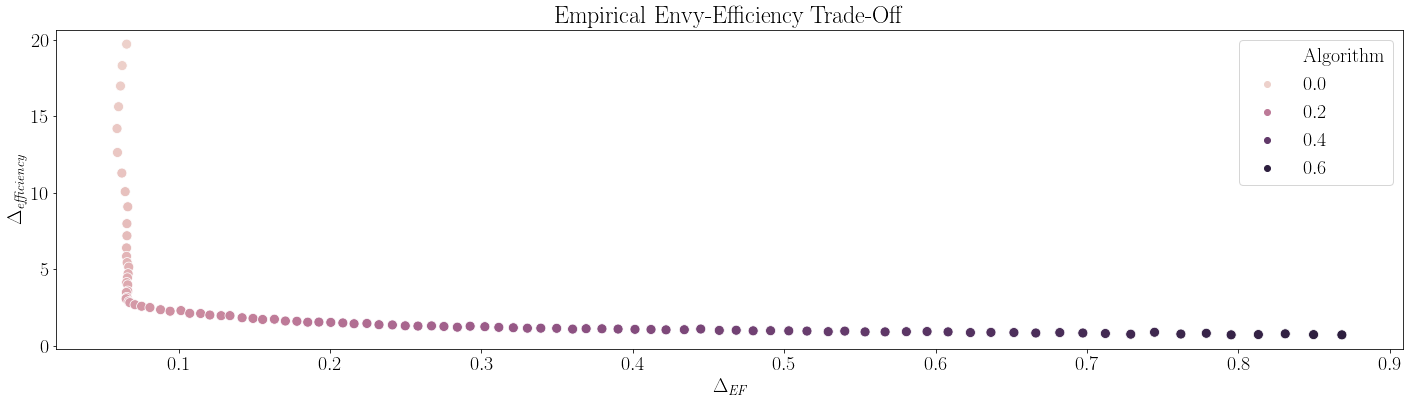

In [169]:

plt.style.use('PaperDoubleFig.mplstyle.txt')
dashesStyles = [[3,1],
            [2,1,10,1],
            [4, 1, 1, 1, 1, 1],[1000,1],[8,2]]


# fig = plt.figure(figsize=(20,6))
plt.rc('text', usetex=True)
fg, axs = plt.subplots(1,1, sharex='all', figsize=(20,6))
sns.scatterplot(x='Linf', y='Waste', data=vals, hue='Algorithm', ax = axs, s=100,ci = None)


# axs.get_legend().remove()
axs.set_ylabel(r'$\Delta_{\it efficiency}$')
axs.set_xlabel(r'$\Delta_{\it EF}$')
axs.set_title('Empirical Envy-Efficiency Trade-Off')

plt.show()
# fg.savefig('./figures/poisson_single.pdf', bbox_inches = 'tight',pad_inches = 0.01, dpi=900)


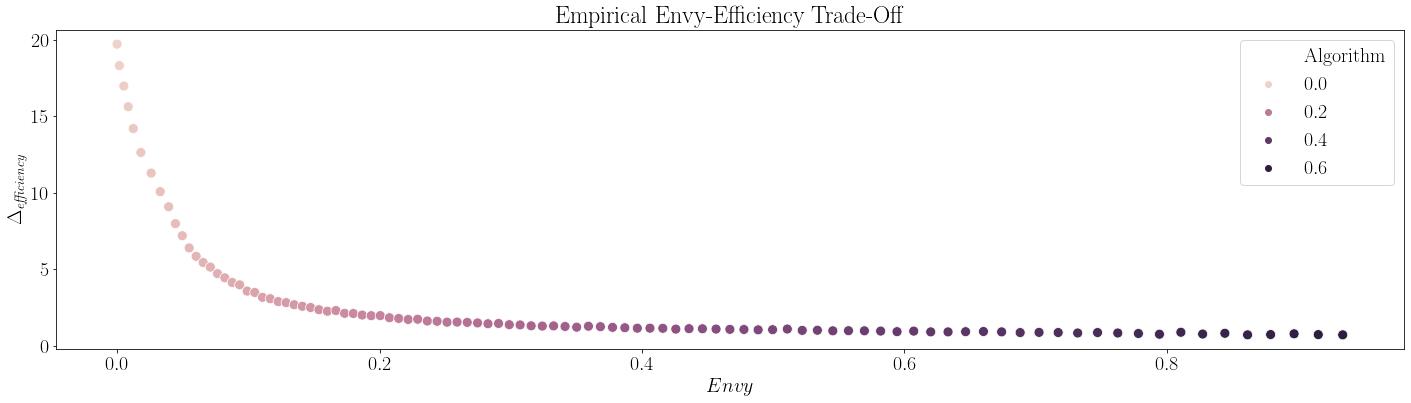

In [170]:

plt.style.use('PaperDoubleFig.mplstyle.txt')
dashesStyles = [[3,1],
            [2,1,10,1],
            [4, 1, 1, 1, 1, 1],[1000,1],[8,2]]


# fig = plt.figure(figsize=(20,6))
plt.rc('text', usetex=True)
fg, axs = plt.subplots(1,1, sharex='all', figsize=(20,6))
sns.scatterplot(x='Hindsight', y='Waste', data=vals, ax = axs, hue='Algorithm', s=100,ci = None)


# axs.get_legend().remove()
axs.set_ylabel(r'$\Delta_{\it efficiency}$')
axs.set_xlabel(r'$Envy$')
axs.set_title('Empirical Envy-Efficiency Trade-Off')

plt.show()
# fg.savefig('./figures/poisson_single.pdf', bbox_inches = 'tight',pad_inches = 0.01, dpi=900)


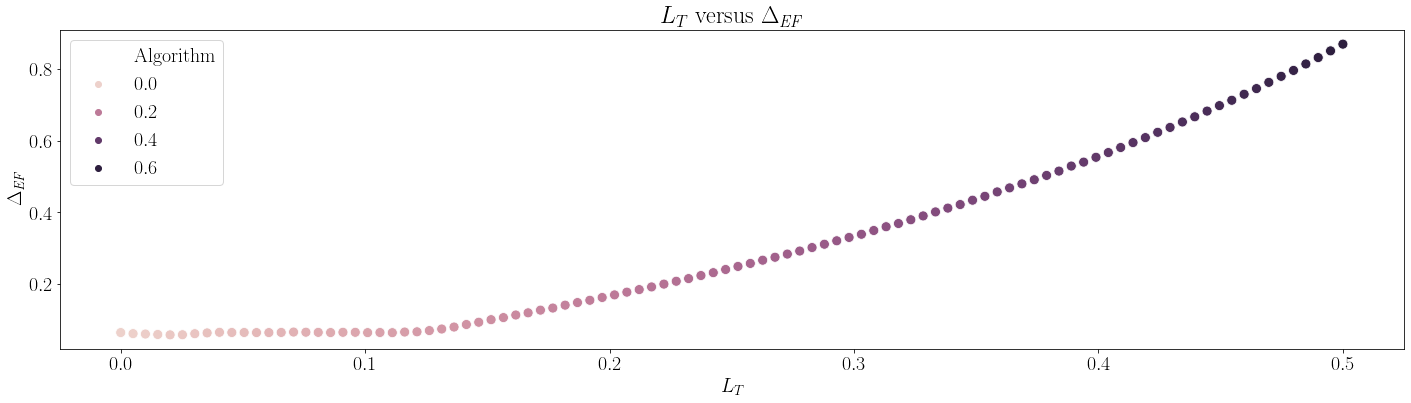

In [171]:


df.columns


plt.style.use('PaperDoubleFig.mplstyle.txt')
dashesStyles = [[3,1],
            [2,1,10,1],
            [4, 1, 1, 1, 1, 1],[1000,1],[8,2]]


# fig = plt.figure(figsize=(20,6))
plt.rc('text', usetex=True)
fg, axs = plt.subplots(1,1, sharex='all', figsize=(20,6))
sns.scatterplot(x='Algorithm', y='Linf', data=vals, ax = axs, hue='Algorithm', s=100,ci = None)


# axs.get_legend().remove()
axs.set_ylabel(r'$\Delta_{\it EF}$')
axs.set_xlabel(r'$L_T$')
axs.set_title(r'$L_T$ versus $\Delta_{\it EF}$')

plt.show()
# fg.savefig('./figures/poisson_single.pdf', bbox_inches = 'tight',pad_inches = 0.01, dpi=900)


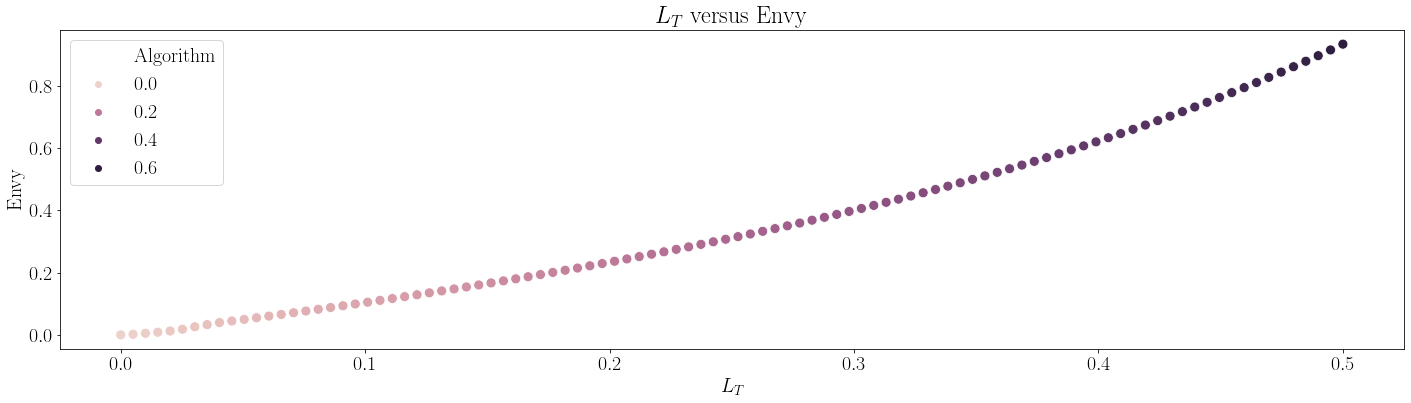

In [172]:


df.columns


plt.style.use('PaperDoubleFig.mplstyle.txt')
dashesStyles = [[3,1],
            [2,1,10,1],
            [4, 1, 1, 1, 1, 1],[1000,1],[8,2]]


# fig = plt.figure(figsize=(20,6))
plt.rc('text', usetex=True)
fg, axs = plt.subplots(1,1, sharex='all', figsize=(20,6))
sns.scatterplot(x='Algorithm', y='Hindsight', data=vals, ax = axs, hue='Algorithm', s=100,ci = None)


# axs.get_legend().remove()
axs.set_ylabel(r'Envy')
axs.set_xlabel(r'$L_T$')
axs.set_title(r'$L_T$ versus Envy')

plt.show()
# fg.savefig('./figures/poisson_single.pdf', bbox_inches = 'tight',pad_inches = 0.01, dpi=900)


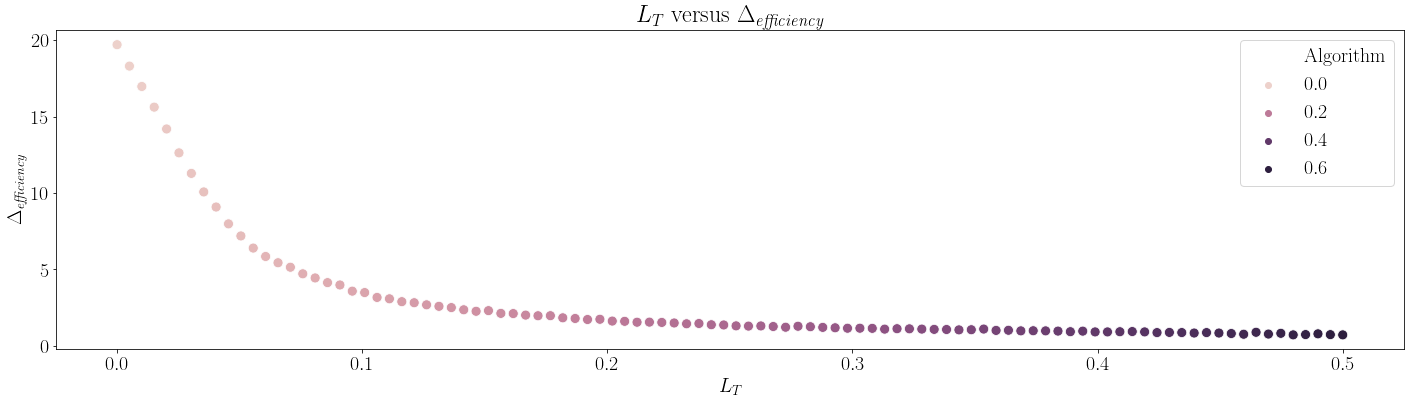

In [173]:


df.columns


plt.style.use('PaperDoubleFig.mplstyle.txt')
dashesStyles = [[3,1],
            [2,1,10,1],
            [4, 1, 1, 1, 1, 1],[1000,1],[8,2]]


# fig = plt.figure(figsize=(20,6))
plt.rc('text', usetex=True)
fg, axs = plt.subplots(1,1, sharex='all', figsize=(20,6))
sns.scatterplot(x='Algorithm', y='Waste', data=vals, ax = axs, hue='Algorithm', s=100,ci = None)


# axs.get_legend().remove()
axs.set_ylabel(r'$\Delta_{\it efficiency}$')
axs.set_xlabel(r'$L_T$')
axs.set_title(r'$L_T$ versus $\Delta_{\it efficiency}$')

plt.show()
# fg.savefig('./figures/poisson_single.pdf', bbox_inches = 'tight',pad_inches = 0.01, dpi=900)
